In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.optimizers import Adam
import math
from sklearn.metrics import mean_squared_error,  mean_absolute_percentage_error, mean_squared_error


In [2]:

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)


# BNB Coin

In [3]:

# BNB Coin
file_path = "D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/BNB Historical Data.csv"
BNBCoin = pd.read_csv(file_path)
# Chuyển đổi cột 'Date' sang định dạng ngày tháng
BNBCoin['Date'] = pd.to_datetime(BNBCoin['Date'])

# Đặt cột 'Date' làm chỉ số
BNBCoin.set_index('Date', inplace=True)
BNBCoin.sort_values('Date', inplace=True)


Scaler Data

In [4]:

# Selecting Price values
dataset_BNBcoin = BNBCoin.Price.values 
# Reshaping 1D to 2D array
dataset_BNBcoin = np.reshape(dataset_BNBcoin, (-1,1))


In [5]:

# Đánh dấu sửa đổi: Sử dụng scaler.fit_transform cho toàn bộ dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_BNBcoin = scaler.fit_transform(dataset_BNBcoin)


## Divide data 8:2

In [6]:


# Setting 80 percent data for training
training_data_len_BNBcoin_82 = math.ceil(len(BNBCoin) * .8)
 
# Splitting the dataset
train_data_BNB_82 = BNBCoin[:training_data_len_BNBcoin_82]
test_data_BNB_82 = BNBCoin[training_data_len_BNBcoin_82:]


In [7]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_BNBcoin_82 = scaled_BNBcoin[:training_data_len_BNBcoin_82]
scaled_test_BNBcoin_82 = scaled_BNBcoin[training_data_len_BNBcoin_82:]


In [8]:

X_train_BNBcoin_82 = []
y_train_BNBcoin_82 = []
for i in range(50, len(scaled_train_BNBcoin_82)):
    X_train_BNBcoin_82.append(scaled_train_BNBcoin_82[i-50:i, 0])
    y_train_BNBcoin_82.append(scaled_train_BNBcoin_82[i, 0])



In [9]:

last_50_days_train_BNBcoin_82 = scaled_train_BNBcoin_82[-50:]
full_test_input_BNBcoin_82 = np.concatenate((last_50_days_train_BNBcoin_82, scaled_test_BNBcoin_82), axis=0)
X_test_BNBcoin_82 = []
for i in range(50, len(full_test_input_BNBcoin_82)):
    X_test_BNBcoin_82.append(full_test_input_BNBcoin_82[i-50:i, 0])




In [10]:

# The data is converted to Numpy array
X_train_BNBcoin_82, y_train_BNBcoin_82 = np.array(X_train_BNBcoin_82), np.array(y_train_BNBcoin_82)

# Reshaping
X_train_BNBcoin_82 = np.reshape(X_train_BNBcoin_82, (X_train_BNBcoin_82.shape[0], X_train_BNBcoin_82.shape[1], 1))

# The data is converted to numpy array
X_test_BNBcoin_82 = np.array(X_test_BNBcoin_82)

# Reshaping
X_test_BNBcoin_82 = np.reshape(X_test_BNBcoin_82, (X_test_BNBcoin_82.shape[0], X_test_BNBcoin_82.shape[1], 1))


In [14]:

regressorGRU_BNBcoin_82 = Sequential()
regressorGRU_BNBcoin_82.add(GRU(50, return_sequences=False, input_shape=(X_train_BNBcoin_82.shape[1], 1)))
regressorGRU_BNBcoin_82.add(Dense(1))

# Compile the regressorGRU_BNBcoin_82
regressorGRU_BNBcoin_82.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_BNBcoin_82.fit(X_train_BNBcoin_82, y_train_BNBcoin_82, epochs=100, batch_size=64, validation_split=0.2)
y_GRU_BNBcoin_82 = regressorGRU_BNBcoin_82.predict(X_test_BNBcoin_82)
y_GRU_O_BNBcoin_82 = scaler.inverse_transform(y_GRU_BNBcoin_82)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BNBcoin_82 = X_test_BNBcoin_82[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1338 - val_loss: 7.2267e-04
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0240 - val_loss: 0.0012
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - val_loss: 5.0695e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0015 - val_loss: 3.7592e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013 - val_loss: 3.4467e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6003e-04 - val_loss: 3.6708e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7045e-04 - val_loss: 3.7401e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8361e-04 - val_loss: 3.1351e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010 - val_loss: 3.0498e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.5650e-04 - val_loss: 3.0235e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0950e-04 - val_loss: 3.4438e-04
Epoc

Predict next 30 days

In [15]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_82 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_82 = regressorGRU_BNBcoin_82.predict(last_input_BNBcoin_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_82.append(next_pred_BNBcoin_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_82 = np.append(last_input_BNBcoin_82[1:], next_pred_BNBcoin_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_82 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_82).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

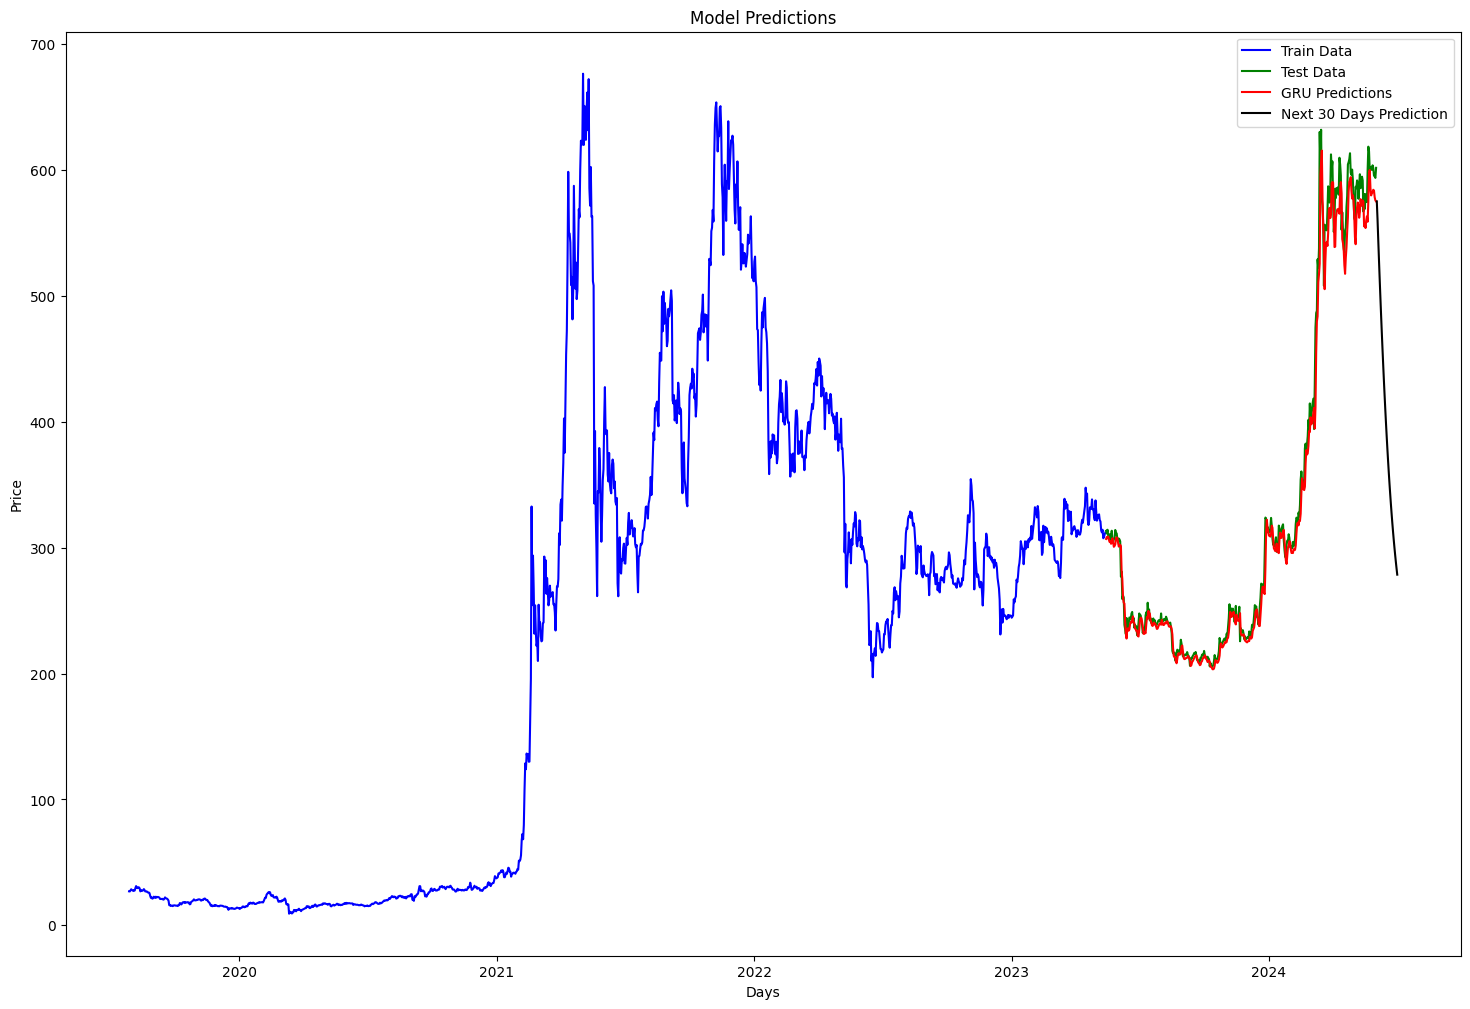

In [16]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_82.index[150:], train_data_BNB_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_82.index, test_data_BNB_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_82.index[0:], y_GRU_O_BNBcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_BNBCoin_82 = pd.date_range(test_data_BNB_82.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_BNBCoin_82, predicted_prices_BNBcoin_82, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [17]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BNBcoin_60days_82 = X_test_BNBcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_60days_82 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_60days_82 = regressorGRU_BNBcoin_82.predict(last_input_BNBcoin_60days_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_60days_82.append(next_pred_BNBcoin_60days_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_60days_82 = np.append(last_input_BNBcoin_60days_82[1:], next_pred_BNBcoin_60days_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_60days_82 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_60days_82).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━

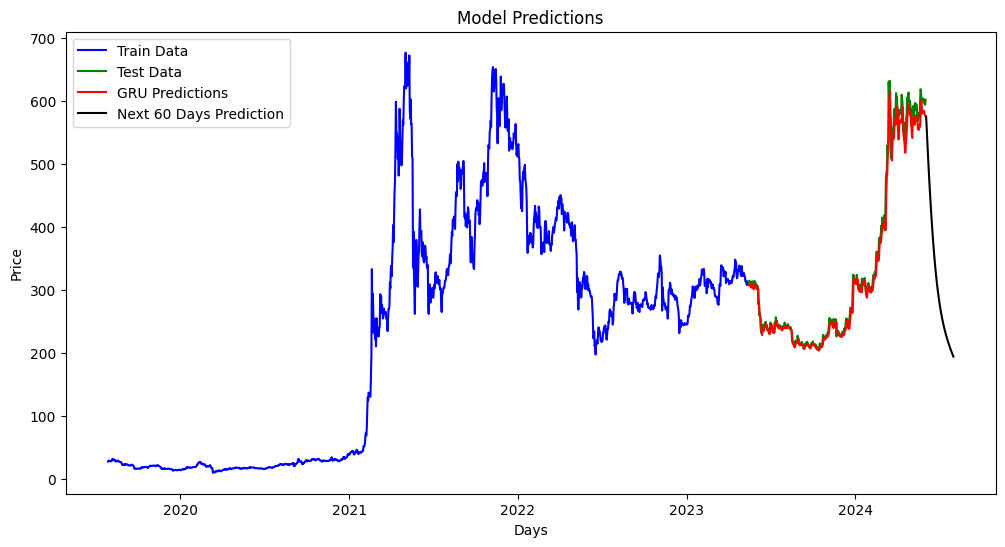

In [18]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_82.index[150:], train_data_BNB_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_82.index, test_data_BNB_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_82.index[0:], y_GRU_O_BNBcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_BNBcoin_82 = pd.date_range(test_data_BNB_82.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_BNBcoin_82, predicted_prices_BNBcoin_60days_82, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [19]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BNBcoin_90days_82 = X_test_BNBcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_90days_82 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_90days_82 = regressorGRU_BNBcoin_82.predict(last_input_BNBcoin_90days_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_90days_82.append(next_pred_BNBcoin_90days_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_90days_82 = np.append(last_input_BNBcoin_90days_82[1:], next_pred_BNBcoin_90days_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_90days_82 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_90days_82).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

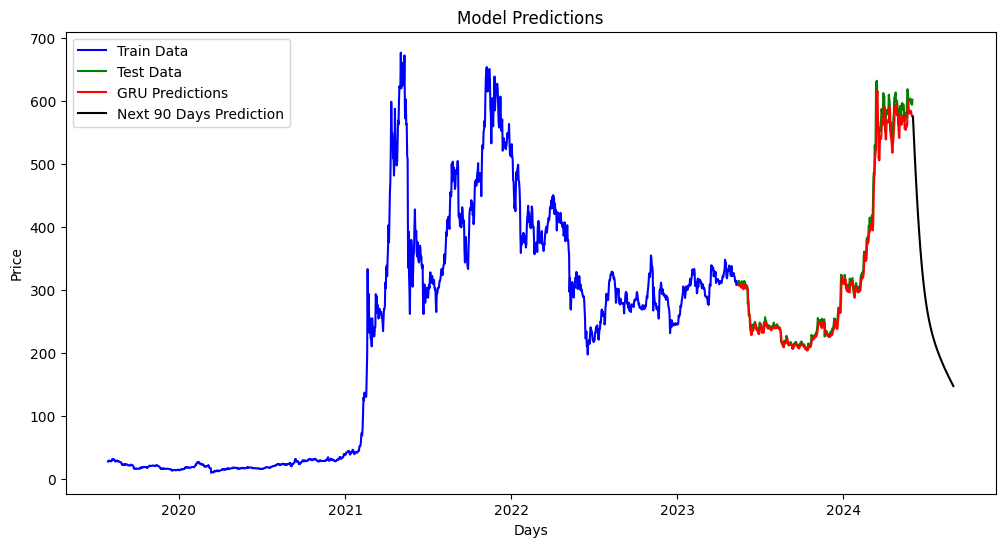

In [20]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_82.index[150:], train_data_BNB_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_82.index, test_data_BNB_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_82.index[0:], y_GRU_O_BNBcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_BNBcoin_82 = pd.date_range(test_data_BNB_82.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_BNBcoin_82, predicted_prices_BNBcoin_90days_82, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


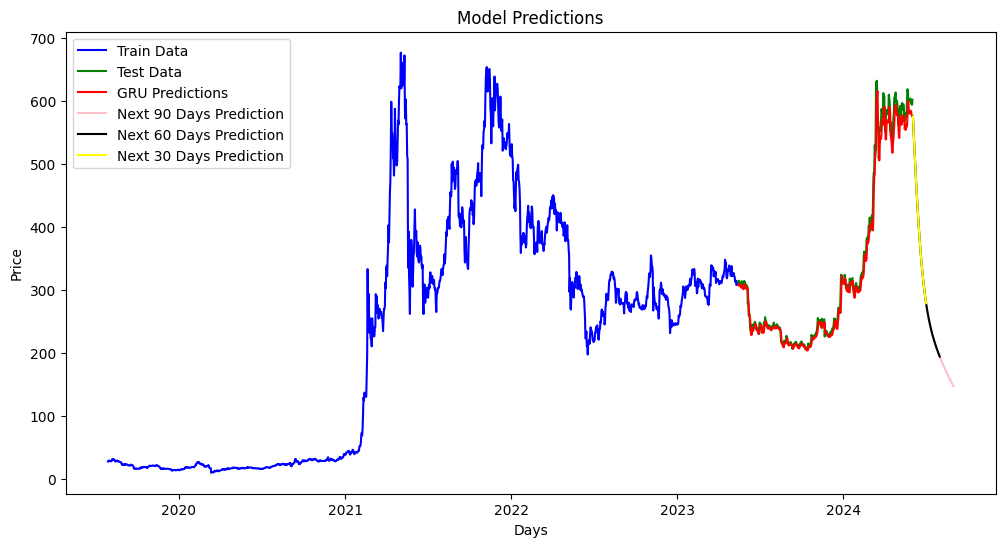

In [21]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_82.index[150:], train_data_BNB_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_82.index, test_data_BNB_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_82.index[0:], y_GRU_O_BNBcoin_82, label="GRU Predictions", color="red")

plt.plot(next_90_days_BNBcoin_82, predicted_prices_BNBcoin_90days_82, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_BNBcoin_82, predicted_prices_BNBcoin_60days_82, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_BNBCoin_82, predicted_prices_BNBcoin_82, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [41]:

actual_prices_BNBcoin_82 = test_data_BNB_82.Price.values
actual_prices_BNBcoin_82 = np.reshape(actual_prices_BNBcoin_82, (-1, 1))

mape_BNBcoin_82 = calculate_mape(actual_prices_BNBcoin_82, y_GRU_O_BNBcoin_82)
mse_BNBcoin_82 = calculate_mse(actual_prices_BNBcoin_82, y_GRU_O_BNBcoin_82)
rmse_BNBcoin_82 = calculate_rmse(actual_prices_BNBcoin_82, y_GRU_O_BNBcoin_82)

print("MAPE: ", mape_BNBcoin_82)
print("MSE: ", mse_BNBcoin_82)
print("RMSE: ", rmse_BNBcoin_82)

MAPE:  2.425117831330498
MSE:  212.92480687456614
RMSE:  14.591943217905083


## Divide data 7:3

In [20]:


# Setting 70 percent data for training
training_data_len_BNBcoin_73 = math.ceil(len(BNBCoin) * .7)
 
# Splitting the dataset
train_data_BNB_73 = BNBCoin[:training_data_len_BNBcoin_73]
test_data_BNB_73 = BNBCoin[training_data_len_BNBcoin_73:]


In [21]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_BNBcoin_73 = scaled_BNBcoin[:training_data_len_BNBcoin_73]
scaled_test_BNBcoin_73 = scaled_BNBcoin[training_data_len_BNBcoin_73:]


In [22]:

X_train_BNBcoin_73 = []
y_train_BNBcoin_73 = []
for i in range(50, len(scaled_train_BNBcoin_73)):
    X_train_BNBcoin_73.append(scaled_train_BNBcoin_73[i-50:i, 0])
    y_train_BNBcoin_73.append(scaled_train_BNBcoin_73[i, 0])



In [23]:

last_50_days_train_BNBcoin_73 = scaled_train_BNBcoin_73[-50:]
full_test_input_BNBcoin_73 = np.concatenate((last_50_days_train_BNBcoin_73, scaled_test_BNBcoin_73), axis=0)
X_test_BNBcoin_73 = []
for i in range(50, len(full_test_input_BNBcoin_73)):
    X_test_BNBcoin_73.append(full_test_input_BNBcoin_73[i-50:i, 0])




In [24]:

# The data is converted to Numpy array
X_train_BNBcoin_73, y_train_BNBcoin_73 = np.array(X_train_BNBcoin_73), np.array(y_train_BNBcoin_73)

# Reshaping
X_train_BNBcoin_73 = np.reshape(X_train_BNBcoin_73, (X_train_BNBcoin_73.shape[0], X_train_BNBcoin_73.shape[1], 1))

# The data is converted to numpy array
X_test_BNBcoin_73 = np.array(X_test_BNBcoin_73)

# Reshaping
X_test_BNBcoin_73 = np.reshape(X_test_BNBcoin_73, (X_test_BNBcoin_73.shape[0], X_test_BNBcoin_73.shape[1], 1))


In [25]:
regressorGRU_BNBcoin_73 = Sequential()
regressorGRU_BNBcoin_73.add(GRU(50, return_sequences=False, input_shape=(X_train_BNBcoin_73.shape[1], 1)))
regressorGRU_BNBcoin_73.add(Dense(1))

# Compile the regressorGRU_BNBcoin_73
regressorGRU_BNBcoin_73.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_BNBcoin_73.fit(X_train_BNBcoin_73, y_train_BNBcoin_73, epochs=100, batch_size=64, validation_split=0.3)
y_GRU_BNBcoin_73 = regressorGRU_BNBcoin_73.predict(X_test_BNBcoin_73)
y_GRU_O_BNBcoin_73 = scaler.inverse_transform(y_GRU_BNBcoin_73)
last_input_BNBcoin_73 = X_test_BNBcoin_73[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0334 - val_loss: 0.0020
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036 - val_loss: 9.9950e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 9.1051e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.8737e-04 - val_loss: 8.7276e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3488e-04 - val_loss: 8.1432e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.5236e-04 - val_loss: 7.8208e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.3336e-04 - val_loss: 8.0101e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9344e-04 - val_loss: 7.6917e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8645e-04 - val_loss: 8.7779e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.7839e-04 - val_loss: 7.0916e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.3800e-04 - val_loss: 8.1

Predict next 30 days

In [26]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_73 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_73 = regressorGRU_BNBcoin_73.predict(last_input_BNBcoin_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_73.append(next_pred_BNBcoin_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_73 = np.append(last_input_BNBcoin_73[1:], next_pred_BNBcoin_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_73 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_73).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

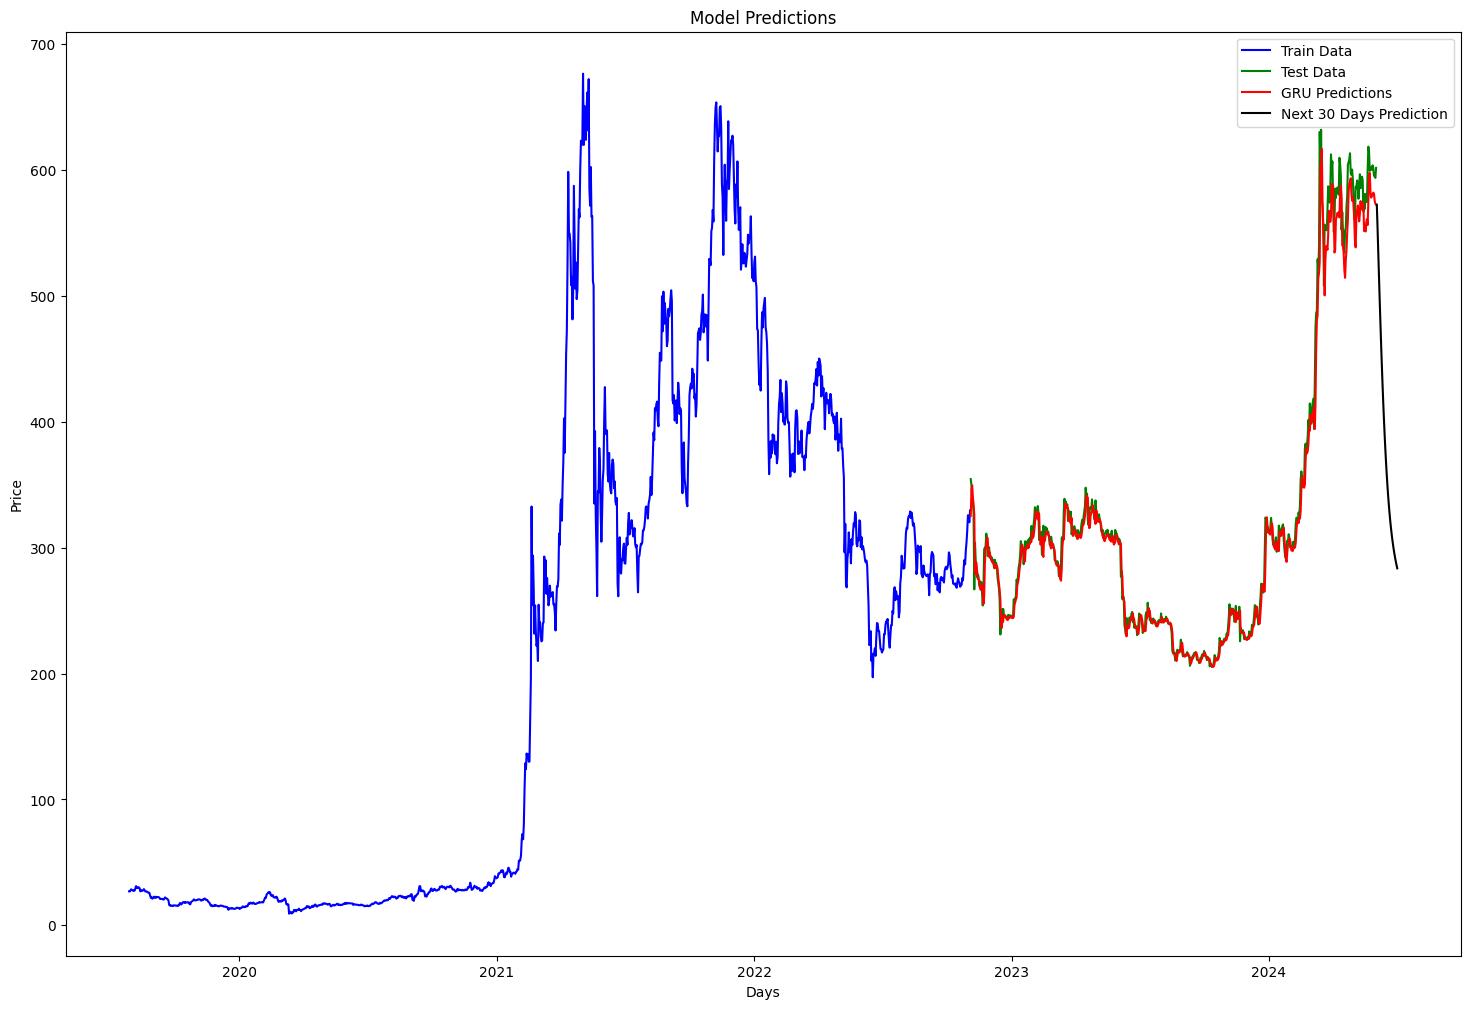

In [27]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_73.index[150:], train_data_BNB_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_73.index, test_data_BNB_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_73.index[0:], y_GRU_O_BNBcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_BNBCoin_73 = pd.date_range(test_data_BNB_73.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_BNBCoin_73, predicted_prices_BNBcoin_73, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [28]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BNBcoin_60days_73 = X_test_BNBcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_60days_73 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_60days_73 = regressorGRU_BNBcoin_73.predict(last_input_BNBcoin_60days_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_60days_73.append(next_pred_BNBcoin_60days_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_60days_73 = np.append(last_input_BNBcoin_60days_73[1:], next_pred_BNBcoin_60days_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_60days_73 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_60days_73).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

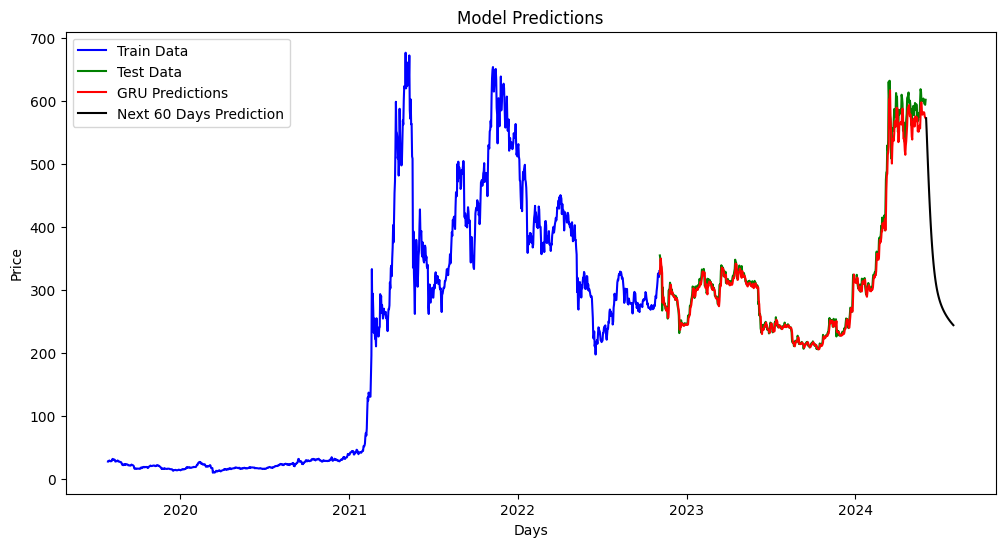

In [29]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_73.index[150:], train_data_BNB_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_73.index, test_data_BNB_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_73.index[0:], y_GRU_O_BNBcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_BNBcoin_73 = pd.date_range(test_data_BNB_73.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_BNBcoin_73, predicted_prices_BNBcoin_60days_73, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [30]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BNBcoin_90days_73 = X_test_BNBcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_90days_73 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_90days_73 = regressorGRU_BNBcoin_73.predict(last_input_BNBcoin_90days_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_90days_73.append(next_pred_BNBcoin_90days_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_90days_73 = np.append(last_input_BNBcoin_90days_73[1:], next_pred_BNBcoin_90days_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_90days_73 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_90days_73).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

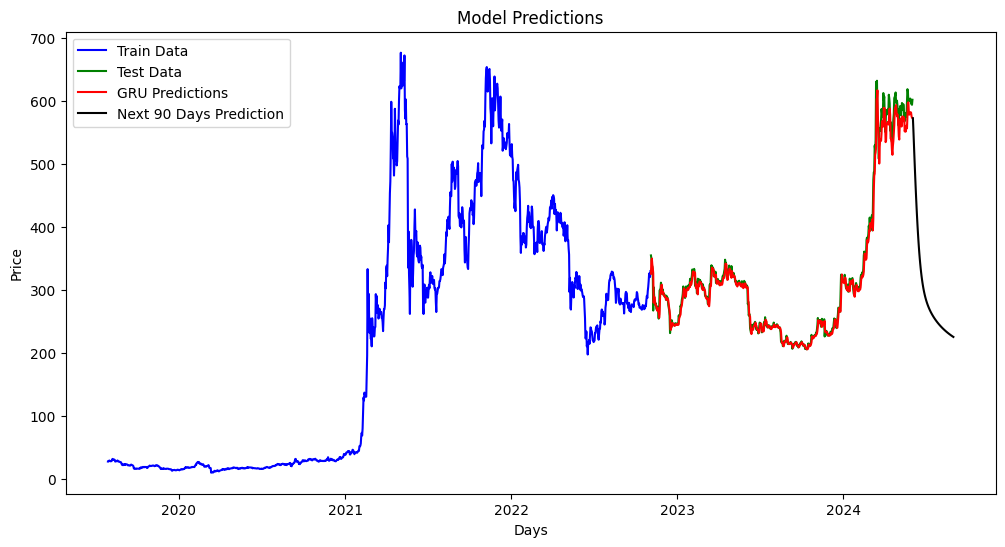

In [31]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_73.index[150:], train_data_BNB_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_73.index, test_data_BNB_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_73.index[0:], y_GRU_O_BNBcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_BNBcoin_73 = pd.date_range(test_data_BNB_73.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_BNBcoin_73, predicted_prices_BNBcoin_90days_73, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


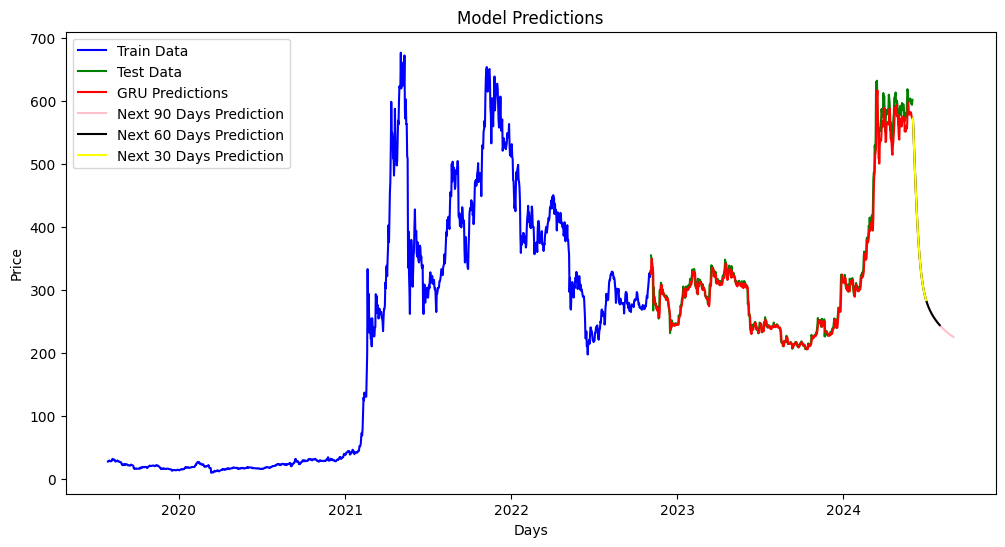

In [32]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_73.index[150:], train_data_BNB_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_73.index, test_data_BNB_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_73.index[0:], y_GRU_O_BNBcoin_73, label="GRU Predictions", color="red")

plt.plot(next_90_days_BNBcoin_73, predicted_prices_BNBcoin_90days_73, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_BNBcoin_73, predicted_prices_BNBcoin_60days_73, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_BNBCoin_73, predicted_prices_BNBcoin_73, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [33]:

actual_prices_BNBcoin_73 = test_data_BNB_73.Price.values
actual_prices_BNBcoin_73 = np.reshape(actual_prices_BNBcoin_73, (-1, 1))

mape_BNBcoin_73 = calculate_mape(actual_prices_BNBcoin_73, y_GRU_O_BNBcoin_73)
mse_BNBcoin_73 = calculate_mse(actual_prices_BNBcoin_73, y_GRU_O_BNBcoin_73)
rmse_BNBcoin_73 = calculate_rmse(actual_prices_BNBcoin_73, y_GRU_O_BNBcoin_73)

print("MAPE: ", mape_BNBcoin_73)
print("MSE: ", mse_BNBcoin_73)
print("RMSE: ", rmse_BNBcoin_73)

MAPE:  2.1596773617166276
MSE:  176.09047920477508
RMSE:  13.269908786603436


## Divide data 9:1

In [34]:


# Setting 90 percent data for training
training_data_len_BNBcoin_91 = math.ceil(len(BNBCoin) * .9)
 
# Splitting the dataset
train_data_BNB_91 = BNBCoin[:training_data_len_BNBcoin_91]
test_data_BNB_91 = BNBCoin[training_data_len_BNBcoin_91:]


In [35]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_BNBcoin_91 = scaled_BNBcoin[:training_data_len_BNBcoin_91]
scaled_test_BNBcoin_91 = scaled_BNBcoin[training_data_len_BNBcoin_91:]


In [36]:

X_train_BNBcoin_91 = []
y_train_BNBcoin_91 = []
for i in range(50, len(scaled_train_BNBcoin_91)):
    X_train_BNBcoin_91.append(scaled_train_BNBcoin_91[i-50:i, 0])
    y_train_BNBcoin_91.append(scaled_train_BNBcoin_91[i, 0])



In [37]:

last_50_days_train_BNBcoin_91 = scaled_train_BNBcoin_91[-50:]
full_test_input_BNBcoin_91 = np.concatenate((last_50_days_train_BNBcoin_91, scaled_test_BNBcoin_91), axis=0)
X_test_BNBcoin_91 = []
for i in range(50, len(full_test_input_BNBcoin_91)):
    X_test_BNBcoin_91.append(full_test_input_BNBcoin_91[i-50:i, 0])




In [38]:

# The data is converted to Numpy array
X_train_BNBcoin_91, y_train_BNBcoin_91 = np.array(X_train_BNBcoin_91), np.array(y_train_BNBcoin_91)

# Reshaping
X_train_BNBcoin_91 = np.reshape(X_train_BNBcoin_91, (X_train_BNBcoin_91.shape[0], X_train_BNBcoin_91.shape[1], 1))

# The data is converted to numpy array
X_test_BNBcoin_91 = np.array(X_test_BNBcoin_91)

# Reshaping
X_test_BNBcoin_91 = np.reshape(X_test_BNBcoin_91, (X_test_BNBcoin_91.shape[0], X_test_BNBcoin_91.shape[1], 1))


In [39]:
regressorGRU_BNBcoin_91 = Sequential()
regressorGRU_BNBcoin_91.add(GRU(50, return_sequences=False, input_shape=(X_train_BNBcoin_91.shape[1], 1)))
regressorGRU_BNBcoin_91.add(Dense(1))

# Compile the regressorGRU_BNBcoin_91
regressorGRU_BNBcoin_91.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_BNBcoin_91.fit(X_train_BNBcoin_91, y_train_BNBcoin_91, epochs=100, batch_size=64, validation_split=0.1)
y_GRU_BNBcoin_91 = regressorGRU_BNBcoin_91.predict(X_test_BNBcoin_91)
y_GRU_O_BNBcoin_91 = scaler.inverse_transform(y_GRU_BNBcoin_91)
last_input_BNBcoin_91 = X_test_BNBcoin_91[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0766 - val_loss: 0.0092
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112 - val_loss: 1.0292e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 2.4045e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2155e-04 - val_loss: 1.0763e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2592e-04 - val_loss: 1.0290e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8745e-04 - val_loss: 9.9613e-05
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7910e-04 - val_loss: 9.3319e-05
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.4144e-04 - val_loss: 9.4843e-05
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8434e-04 - val_loss: 9.2166e-05
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4859e-04 - val_loss: 9.4002e-05
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.3679e-04 - val_loss: 9.5

Predict next 30 days

In [40]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_91 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_91 = regressorGRU_BNBcoin_91.predict(last_input_BNBcoin_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_91.append(next_pred_BNBcoin_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_91 = np.append(last_input_BNBcoin_91[1:], next_pred_BNBcoin_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_91 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_91).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

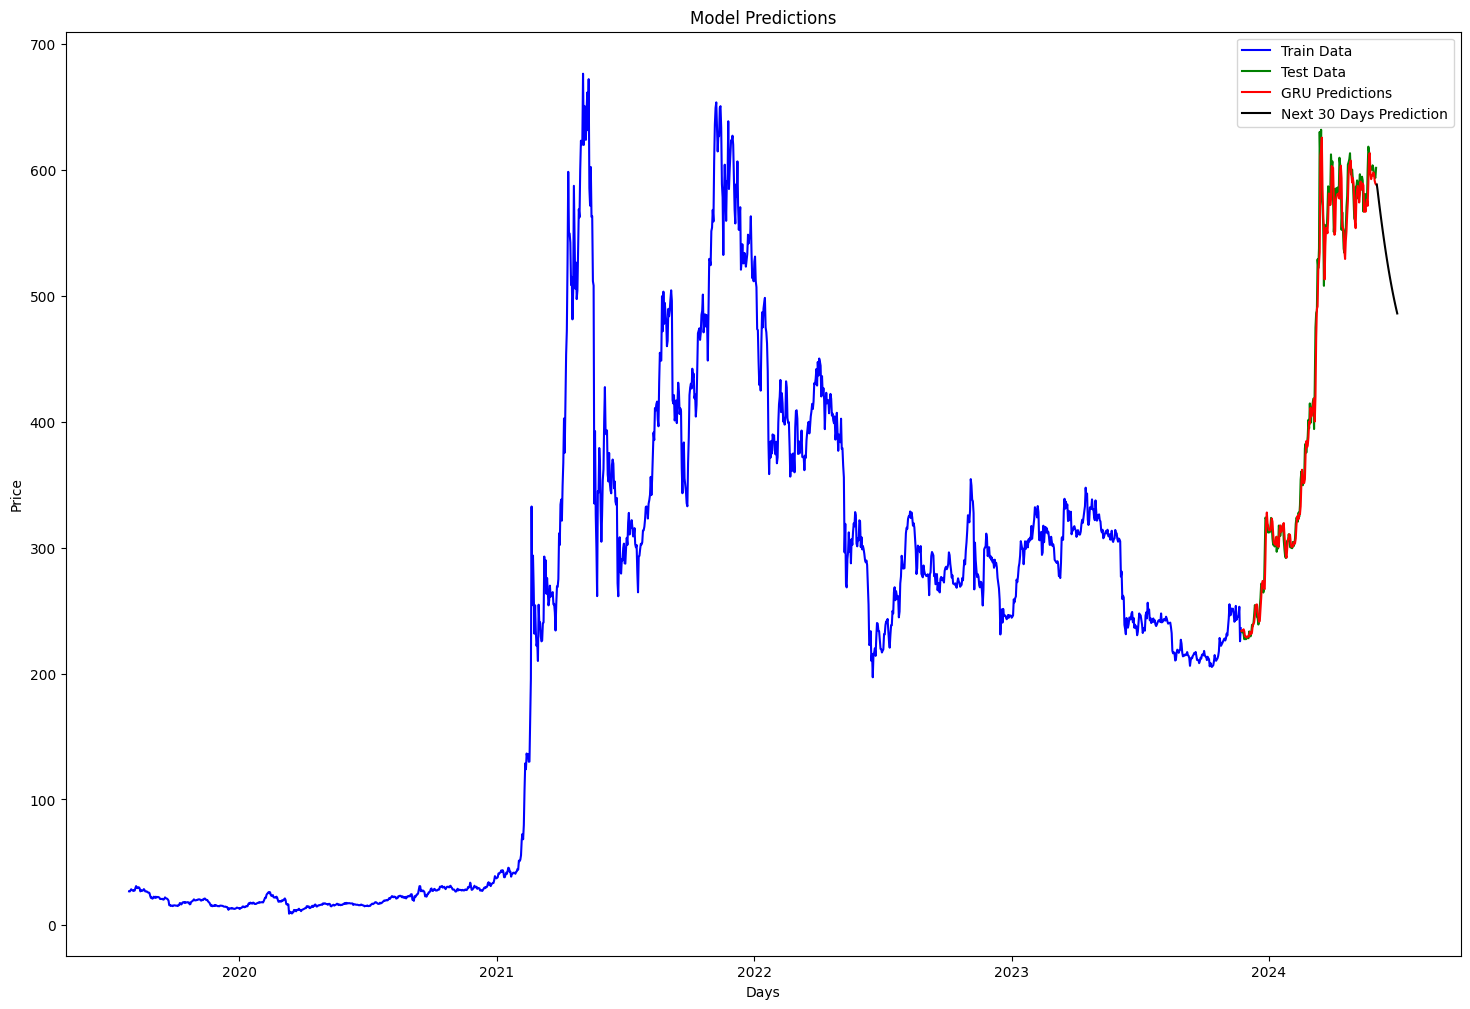

In [41]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_91.index[150:], train_data_BNB_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_91.index, test_data_BNB_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_91.index[0:], y_GRU_O_BNBcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_BNBCoin_91 = pd.date_range(test_data_BNB_91.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_BNBCoin_91, predicted_prices_BNBcoin_91, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [42]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BNBcoin_60days_91 = X_test_BNBcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_60days_91 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_60days_91 = regressorGRU_BNBcoin_91.predict(last_input_BNBcoin_60days_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_60days_91.append(next_pred_BNBcoin_60days_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_60days_91 = np.append(last_input_BNBcoin_60days_91[1:], next_pred_BNBcoin_60days_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_60days_91 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_60days_91).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

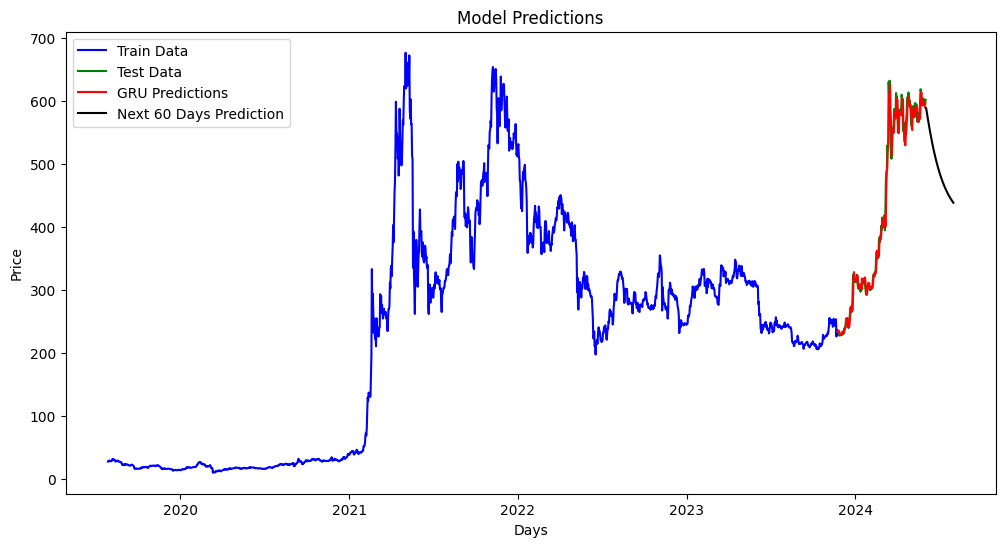

In [43]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_91.index[150:], train_data_BNB_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_91.index, test_data_BNB_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_91.index[0:], y_GRU_O_BNBcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_BNBcoin_91 = pd.date_range(test_data_BNB_91.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_BNBcoin_91, predicted_prices_BNBcoin_60days_91, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [44]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_BNBcoin_90days_91 = X_test_BNBcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_BNBcoin_90days_91 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_BNBcoin_90days_91 = regressorGRU_BNBcoin_91.predict(last_input_BNBcoin_90days_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_BNBcoin_90days_91.append(next_pred_BNBcoin_90days_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_BNBcoin_90days_91 = np.append(last_input_BNBcoin_90days_91[1:], next_pred_BNBcoin_90days_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_BNBcoin_90days_91 = scaler.inverse_transform(np.array(predicted_prices_BNBcoin_90days_91).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

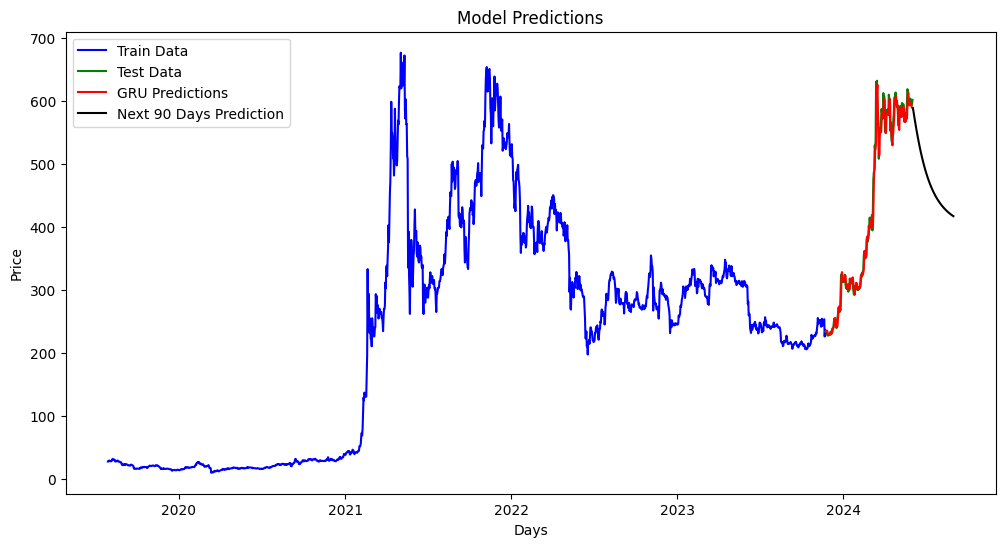

In [45]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_91.index[150:], train_data_BNB_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_91.index, test_data_BNB_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_91.index[0:], y_GRU_O_BNBcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_BNBcoin_91 = pd.date_range(test_data_BNB_91.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_BNBcoin_91, predicted_prices_BNBcoin_90days_91, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


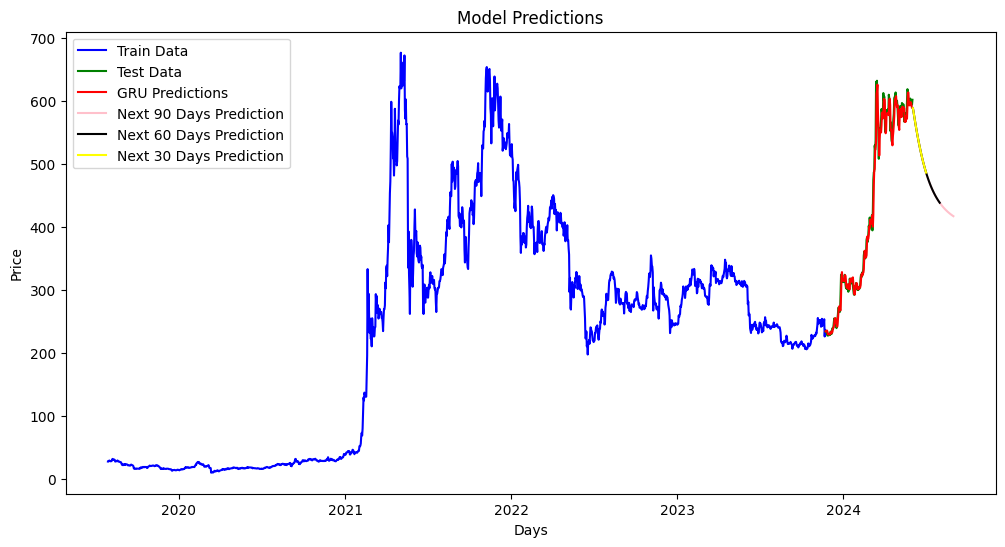

In [46]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_BNB_91.index[150:], train_data_BNB_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_BNB_91.index, test_data_BNB_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_BNB_91.index[0:], y_GRU_O_BNBcoin_91, label="GRU Predictions", color="red")

plt.plot(next_90_days_BNBcoin_91, predicted_prices_BNBcoin_90days_91, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_BNBcoin_91, predicted_prices_BNBcoin_60days_91, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_BNBCoin_91, predicted_prices_BNBcoin_91, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [47]:

actual_prices_BNBcoin_91 = test_data_BNB_91.Price.values
actual_prices_BNBcoin_91 = np.reshape(actual_prices_BNBcoin_91, (-1, 1))

mape_BNBcoin_91 = calculate_mape(actual_prices_BNBcoin_91, y_GRU_O_BNBcoin_91)
mse_BNBcoin_91 = calculate_mse(actual_prices_BNBcoin_91, y_GRU_O_BNBcoin_91)
rmse_BNBcoin_91 = calculate_rmse(actual_prices_BNBcoin_91, y_GRU_O_BNBcoin_91)

print("MAPE: ", mape_BNBcoin_91)
print("MSE: ", mse_BNBcoin_91)
print("RMSE: ", rmse_BNBcoin_91)

MAPE:  2.1748954394822366
MSE:  239.47237613693343
RMSE:  15.47489502830095


# DOGE Coin

In [48]:

# DOGE Coin
file_path = "D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/Dogecoin Historical Data.csv"
DOGECoin = pd.read_csv(file_path)
# Chuyển đổi cột 'Date' sang định dạng ngày tháng
DOGECoin['Date'] = pd.to_datetime(DOGECoin['Date'])

# Đặt cột 'Date' làm chỉ số
DOGECoin.set_index('Date', inplace=True)
DOGECoin.sort_values('Date', inplace=True)


Scaler Data

In [49]:

# Selecting Price values
dataset_DOGEcoin = DOGECoin.Price.values 
# Reshaping 1D to 2D array
dataset_DOGEcoin = np.reshape(dataset_DOGEcoin, (-1,1))


In [50]:

# Đánh dấu sửa đổi: Sử dụng scaler.fit_transform cho toàn bộ dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_DOGEcoin = scaler.fit_transform(dataset_DOGEcoin)


## Divide data 8:2

In [51]:


# Setting 80 percent data for training
training_data_len_DOGEcoin_82 = math.ceil(len(DOGECoin) * .8)
 
# Splitting the dataset
train_data_DOGE_82 = DOGECoin[:training_data_len_DOGEcoin_82]
test_data_DOGE_82 = DOGECoin[training_data_len_DOGEcoin_82:]


In [52]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_DOGEcoin_82 = scaled_DOGEcoin[:training_data_len_DOGEcoin_82]
scaled_test_DOGEcoin_82 = scaled_DOGEcoin[training_data_len_DOGEcoin_82:]


In [53]:

X_train_DOGEcoin_82 = []
y_train_DOGEcoin_82 = []
for i in range(50, len(scaled_train_DOGEcoin_82)):
    X_train_DOGEcoin_82.append(scaled_train_DOGEcoin_82[i-50:i, 0])
    y_train_DOGEcoin_82.append(scaled_train_DOGEcoin_82[i, 0])



In [54]:

last_50_days_train_DOGEcoin_82 = scaled_train_DOGEcoin_82[-50:]
full_test_input_DOGEcoin_82 = np.concatenate((last_50_days_train_DOGEcoin_82, scaled_test_DOGEcoin_82), axis=0)
X_test_DOGEcoin_82 = []
for i in range(50, len(full_test_input_DOGEcoin_82)):
    X_test_DOGEcoin_82.append(full_test_input_DOGEcoin_82[i-50:i, 0])




In [55]:

# The data is converted to Numpy array
X_train_DOGEcoin_82, y_train_DOGEcoin_82 = np.array(X_train_DOGEcoin_82), np.array(y_train_DOGEcoin_82)

# Reshaping
X_train_DOGEcoin_82 = np.reshape(X_train_DOGEcoin_82, (X_train_DOGEcoin_82.shape[0], X_train_DOGEcoin_82.shape[1], 1))

# The data is converted to numpy array
X_test_DOGEcoin_82 = np.array(X_test_DOGEcoin_82)

# Reshaping
X_test_DOGEcoin_82 = np.reshape(X_test_DOGEcoin_82, (X_test_DOGEcoin_82.shape[0], X_test_DOGEcoin_82.shape[1], 1))


In [56]:

regressorGRU_DOGEcoin_82 = Sequential()
regressorGRU_DOGEcoin_82.add(GRU(50, return_sequences=False, input_shape=(X_train_DOGEcoin_82.shape[1], 1)))
regressorGRU_DOGEcoin_82.add(Dense(1))

# Compile the regressorGRU_DOGEcoin_82
regressorGRU_DOGEcoin_82.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_DOGEcoin_82.fit(X_train_DOGEcoin_82, y_train_DOGEcoin_82, epochs=100, batch_size=64, validation_split=0.2)
y_GRU_DOGEcoin_82 = regressorGRU_DOGEcoin_82.predict(X_test_DOGEcoin_82)
y_GRU_O_DOGEcoin_82 = scaler.inverse_transform(y_GRU_DOGEcoin_82)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_82 = X_test_DOGEcoin_82[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0391 - val_loss: 0.0025
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - val_loss: 1.6897e-04
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018 - val_loss: 1.3481e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011 - val_loss: 1.3353e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.0447e-04 - val_loss: 1.3463e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011 - val_loss: 1.4313e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0010 - val_loss: 1.4224e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.2468e-04 - val_loss: 1.5734e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2617e-04 - val_loss: 1.1053e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6645e-04 - val_loss: 1.1250e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.3794e-04 - val_loss: 1.0478e-04
Epoc

Predict next 30 days

In [57]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_82 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_82 = regressorGRU_DOGEcoin_82.predict(last_input_DOGEcoin_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_82.append(next_pred_DOGEcoin_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_82 = np.append(last_input_DOGEcoin_82[1:], next_pred_DOGEcoin_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_82 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_82).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

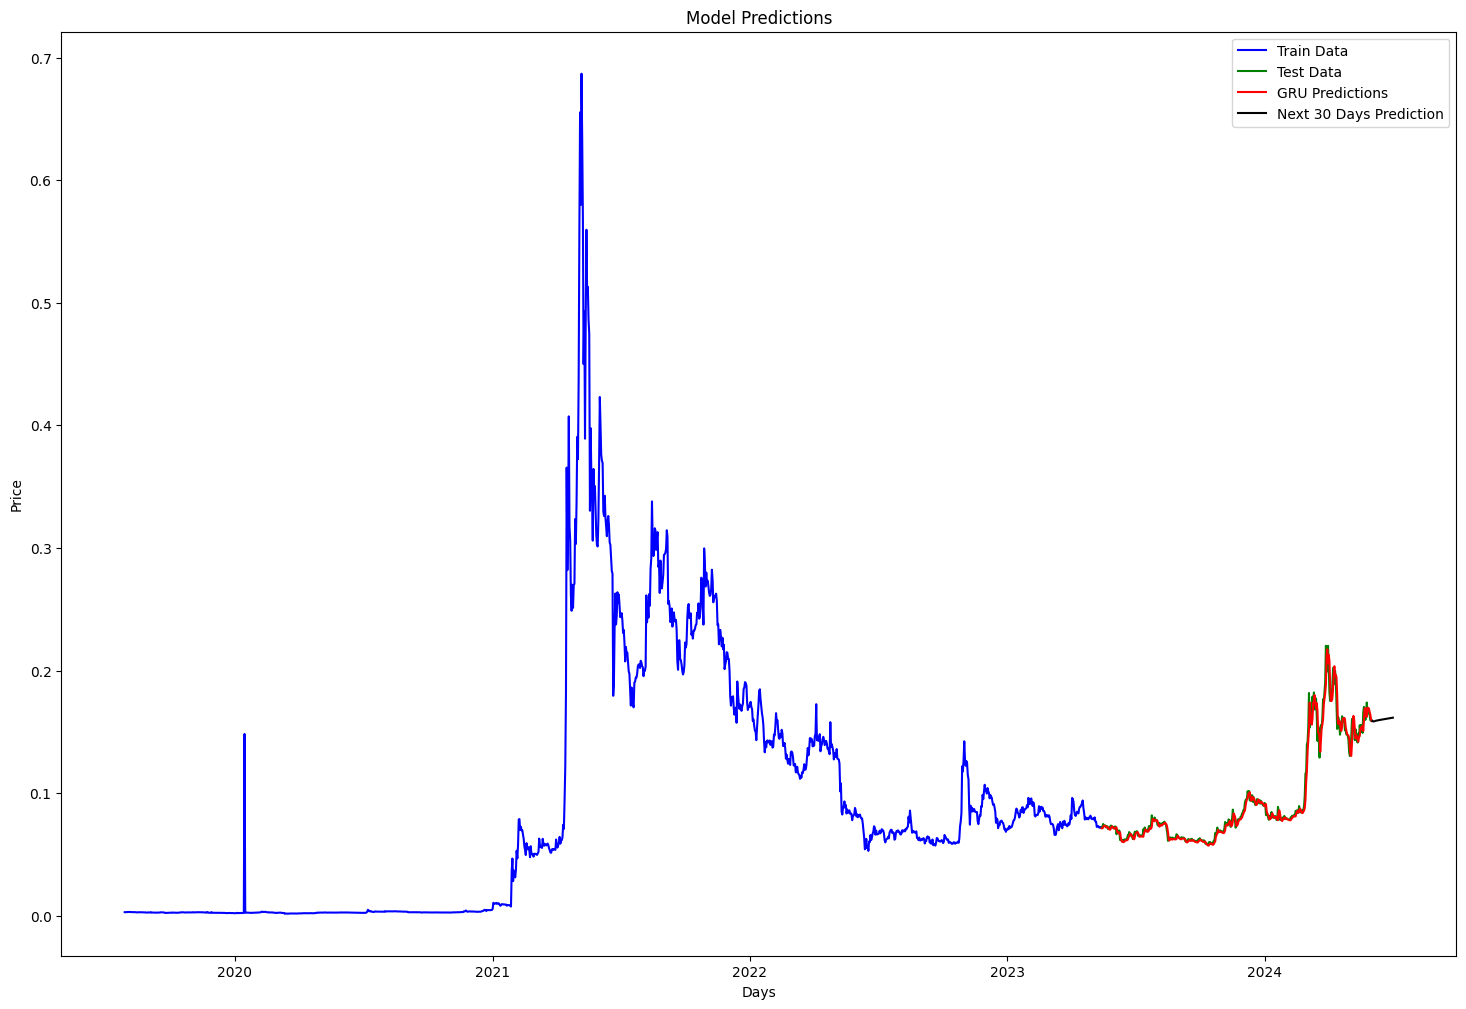

In [58]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_82.index[150:], train_data_DOGE_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_82.index, test_data_DOGE_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_82.index[0:], y_GRU_O_DOGEcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_DOGECoin_82 = pd.date_range(test_data_DOGE_82.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_DOGECoin_82, predicted_prices_DOGEcoin_82, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [59]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_60days_82 = X_test_DOGEcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_60days_82 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_60days_82 = regressorGRU_DOGEcoin_82.predict(last_input_DOGEcoin_60days_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_60days_82.append(next_pred_DOGEcoin_60days_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_60days_82 = np.append(last_input_DOGEcoin_60days_82[1:], next_pred_DOGEcoin_60days_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_60days_82 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_60days_82).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

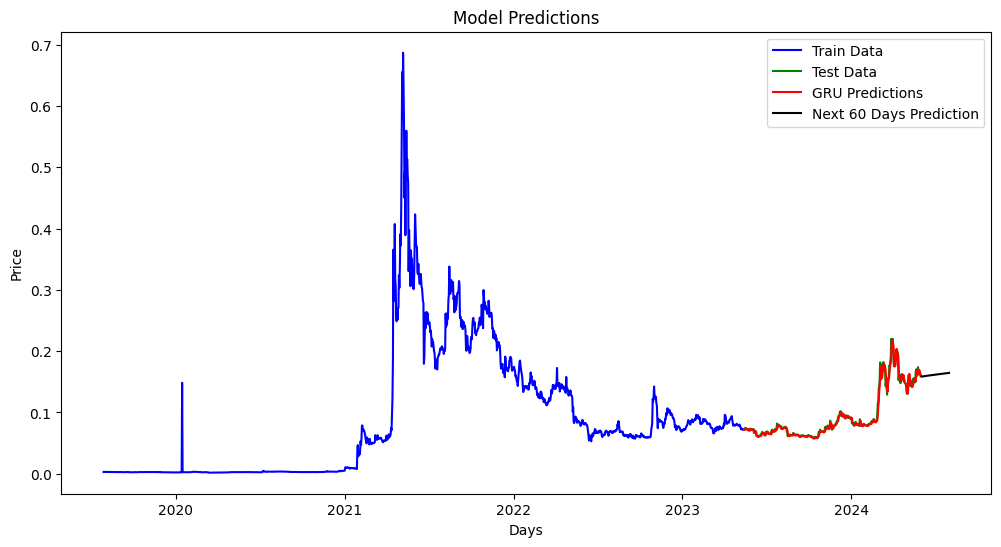

In [60]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_82.index[150:], train_data_DOGE_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_82.index, test_data_DOGE_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_82.index[0:], y_GRU_O_DOGEcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_DOGEcoin_82 = pd.date_range(test_data_DOGE_82.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_DOGEcoin_82, predicted_prices_DOGEcoin_60days_82, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [61]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_90days_82 = X_test_DOGEcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_90days_82 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_90days_82 = regressorGRU_DOGEcoin_82.predict(last_input_DOGEcoin_90days_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_90days_82.append(next_pred_DOGEcoin_90days_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_90days_82 = np.append(last_input_DOGEcoin_90days_82[1:], next_pred_DOGEcoin_90days_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_90days_82 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_90days_82).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━

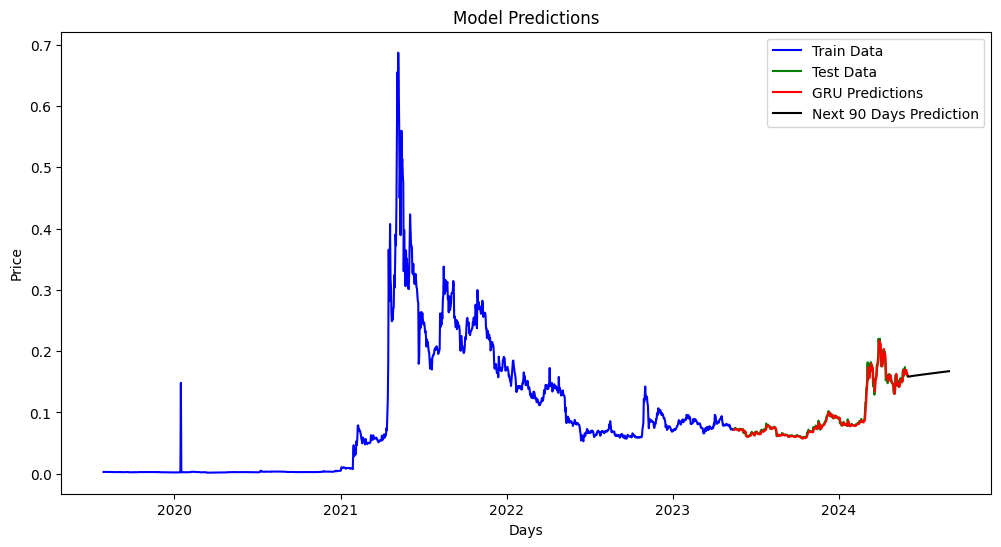

In [62]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_82.index[150:], train_data_DOGE_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_82.index, test_data_DOGE_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_82.index[0:], y_GRU_O_DOGEcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_DOGEcoin_82 = pd.date_range(test_data_DOGE_82.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_DOGEcoin_82, predicted_prices_DOGEcoin_90days_82, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


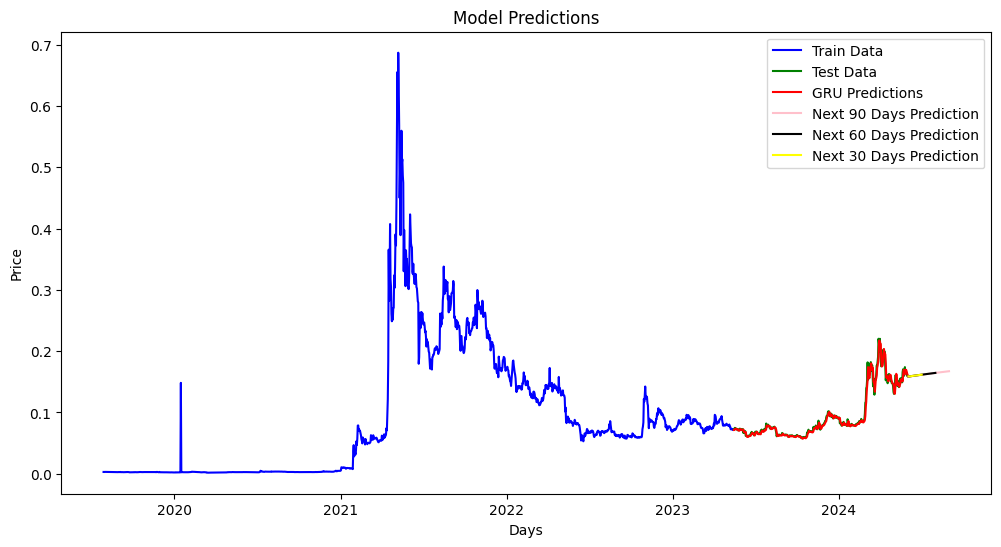

In [63]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_82.index[150:], train_data_DOGE_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_82.index, test_data_DOGE_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_82.index[0:], y_GRU_O_DOGEcoin_82, label="GRU Predictions", color="red")

plt.plot(next_90_days_DOGEcoin_82, predicted_prices_DOGEcoin_90days_82, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_DOGEcoin_82, predicted_prices_DOGEcoin_60days_82, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_DOGECoin_82, predicted_prices_DOGEcoin_82, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [64]:

actual_prices_DOGEcoin_82 = test_data_DOGE_82.Price.values
actual_prices_DOGEcoin_82 = np.reshape(actual_prices_DOGEcoin_82, (-1, 1))

mape_DOGEcoin_82 = calculate_mape(actual_prices_DOGEcoin_82, y_GRU_O_DOGEcoin_82)
mse_DOGEcoin_82 = calculate_mse(actual_prices_DOGEcoin_82, y_GRU_O_DOGEcoin_82)
rmse_DOGEcoin_82 = calculate_rmse(actual_prices_DOGEcoin_82, y_GRU_O_DOGEcoin_82)

print("MAPE: ", mape_DOGEcoin_82)
print("MSE: ", mse_DOGEcoin_82)
print("RMSE: ", rmse_DOGEcoin_82)

MAPE:  3.0826664901417984
MSE:  3.536694702356144e-05
RMSE:  0.00594701160445828


## Divide data 7:3

In [65]:


# Setting 70 percent data for training
training_data_len_DOGEcoin_73 = math.ceil(len(DOGECoin) * .7)
 
# Splitting the dataset
train_data_DOGE_73 = DOGECoin[:training_data_len_DOGEcoin_73]
test_data_DOGE_73 = DOGECoin[training_data_len_DOGEcoin_73:]


In [66]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_DOGEcoin_73 = scaled_DOGEcoin[:training_data_len_DOGEcoin_73]
scaled_test_DOGEcoin_73 = scaled_DOGEcoin[training_data_len_DOGEcoin_73:]


In [67]:

X_train_DOGEcoin_73 = []
y_train_DOGEcoin_73 = []
for i in range(50, len(scaled_train_DOGEcoin_73)):
    X_train_DOGEcoin_73.append(scaled_train_DOGEcoin_73[i-50:i, 0])
    y_train_DOGEcoin_73.append(scaled_train_DOGEcoin_73[i, 0])



In [68]:

last_50_days_train_DOGEcoin_73 = scaled_train_DOGEcoin_73[-50:]
full_test_input_DOGEcoin_73 = np.concatenate((last_50_days_train_DOGEcoin_73, scaled_test_DOGEcoin_73), axis=0)
X_test_DOGEcoin_73 = []
for i in range(50, len(full_test_input_DOGEcoin_73)):
    X_test_DOGEcoin_73.append(full_test_input_DOGEcoin_73[i-50:i, 0])




In [69]:

# The data is converted to Numpy array
X_train_DOGEcoin_73, y_train_DOGEcoin_73 = np.array(X_train_DOGEcoin_73), np.array(y_train_DOGEcoin_73)

# Reshaping
X_train_DOGEcoin_73 = np.reshape(X_train_DOGEcoin_73, (X_train_DOGEcoin_73.shape[0], X_train_DOGEcoin_73.shape[1], 1))

# The data is converted to numpy array
X_test_DOGEcoin_73 = np.array(X_test_DOGEcoin_73)

# Reshaping
X_test_DOGEcoin_73 = np.reshape(X_test_DOGEcoin_73, (X_test_DOGEcoin_73.shape[0], X_test_DOGEcoin_73.shape[1], 1))


In [70]:

regressorGRU_DOGEcoin_73 = Sequential()
regressorGRU_DOGEcoin_73.add(GRU(50, return_sequences=False, input_shape=(X_train_DOGEcoin_73.shape[1], 1)))
regressorGRU_DOGEcoin_73.add(Dense(1))

# Compile the regressorGRU_DOGEcoin_73
regressorGRU_DOGEcoin_73.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_DOGEcoin_73.fit(X_train_DOGEcoin_73, y_train_DOGEcoin_73, epochs=100, batch_size=64, validation_split=0.3)
y_GRU_DOGEcoin_73 = regressorGRU_DOGEcoin_73.predict(X_test_DOGEcoin_73)
y_GRU_O_DOGEcoin_73 = scaler.inverse_transform(y_GRU_DOGEcoin_73)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_73 = X_test_DOGEcoin_73[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - val_loss: 0.0016
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049 - val_loss: 3.7568e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017 - val_loss: 2.7476e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013 - val_loss: 2.0563e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 1.8201e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 1.7174e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011 - val_loss: 1.6979e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.4214e-04 - val_loss: 1.8786e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8097e-04 - val_loss: 1.6196e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 1.6405e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 1.5712e-04
Epoch 12/100
15/

Predict next 30 days

In [71]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_73 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_73 = regressorGRU_DOGEcoin_73.predict(last_input_DOGEcoin_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_73.append(next_pred_DOGEcoin_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_73 = np.append(last_input_DOGEcoin_73[1:], next_pred_DOGEcoin_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_73 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_73).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━

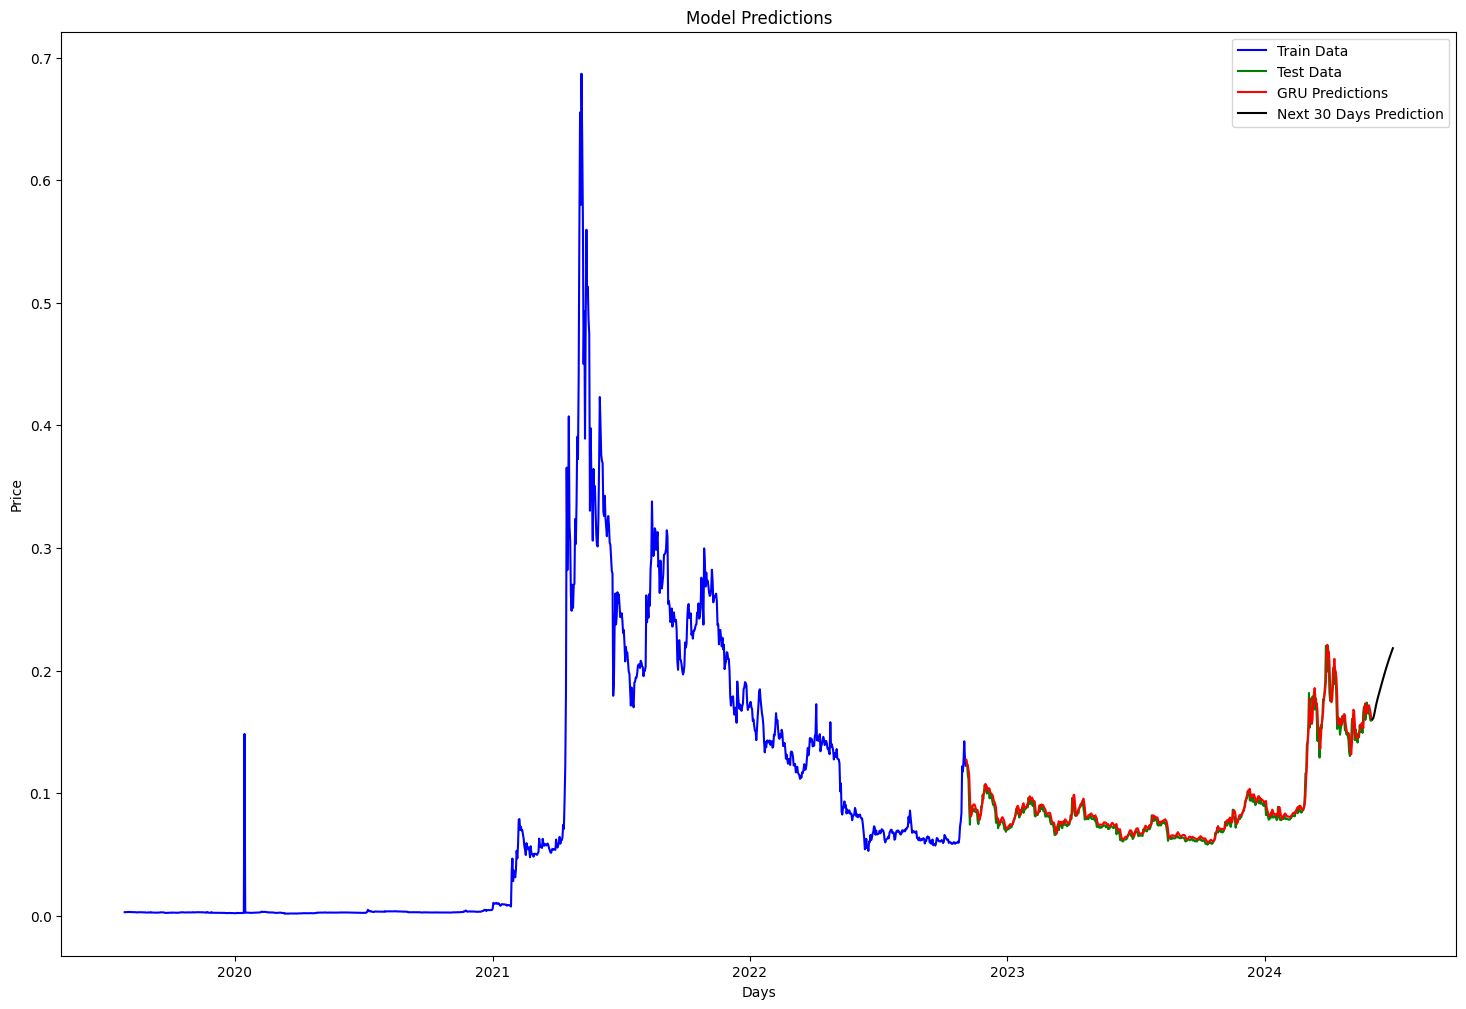

In [72]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_73.index[150:], train_data_DOGE_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_73.index, test_data_DOGE_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_73.index[0:], y_GRU_O_DOGEcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_DOGECoin_73 = pd.date_range(test_data_DOGE_73.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_DOGECoin_73, predicted_prices_DOGEcoin_73, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [73]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_60days_73 = X_test_DOGEcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_60days_73 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_60days_73 = regressorGRU_DOGEcoin_73.predict(last_input_DOGEcoin_60days_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_60days_73.append(next_pred_DOGEcoin_60days_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_60days_73 = np.append(last_input_DOGEcoin_60days_73[1:], next_pred_DOGEcoin_60days_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_60days_73 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_60days_73).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

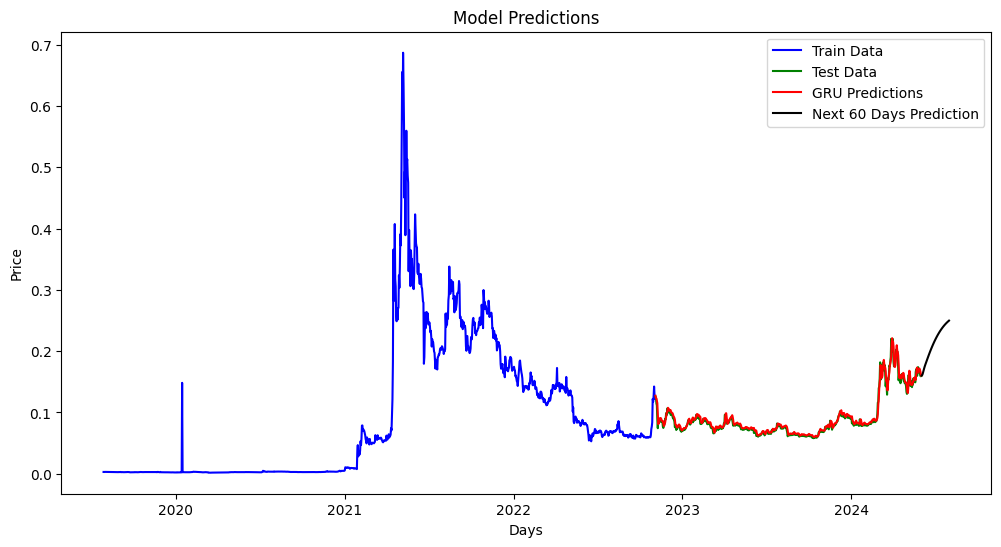

In [74]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_73.index[150:], train_data_DOGE_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_73.index, test_data_DOGE_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_73.index[0:], y_GRU_O_DOGEcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_DOGEcoin_73 = pd.date_range(test_data_DOGE_73.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_DOGEcoin_73, predicted_prices_DOGEcoin_60days_73, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [75]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_90days_73 = X_test_DOGEcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_90days_73 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_90days_73 = regressorGRU_DOGEcoin_73.predict(last_input_DOGEcoin_90days_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_90days_73.append(next_pred_DOGEcoin_90days_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_90days_73 = np.append(last_input_DOGEcoin_90days_73[1:], next_pred_DOGEcoin_90days_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_90days_73 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_90days_73).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

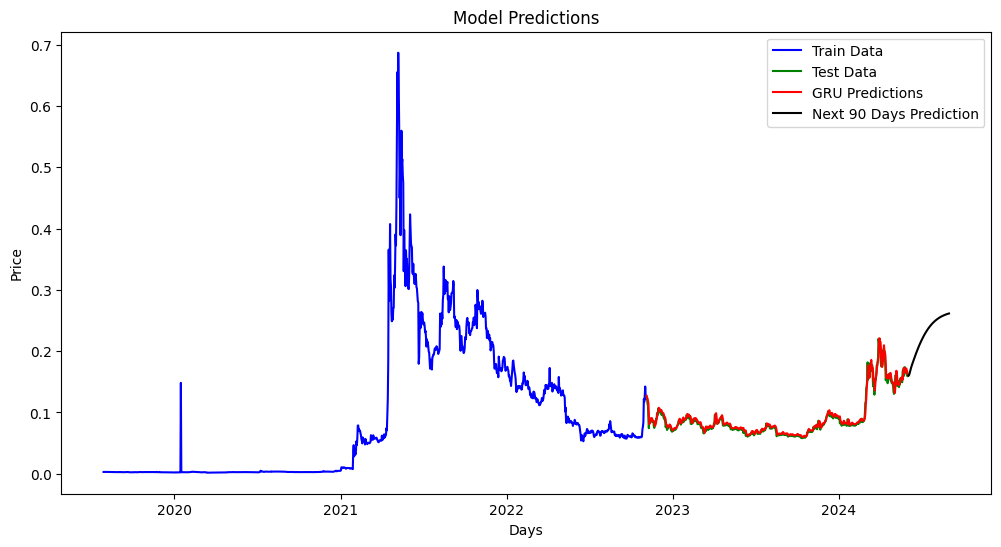

In [76]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_73.index[150:], train_data_DOGE_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_73.index, test_data_DOGE_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_73.index[0:], y_GRU_O_DOGEcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_DOGEcoin_73 = pd.date_range(test_data_DOGE_73.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_DOGEcoin_73, predicted_prices_DOGEcoin_90days_73, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


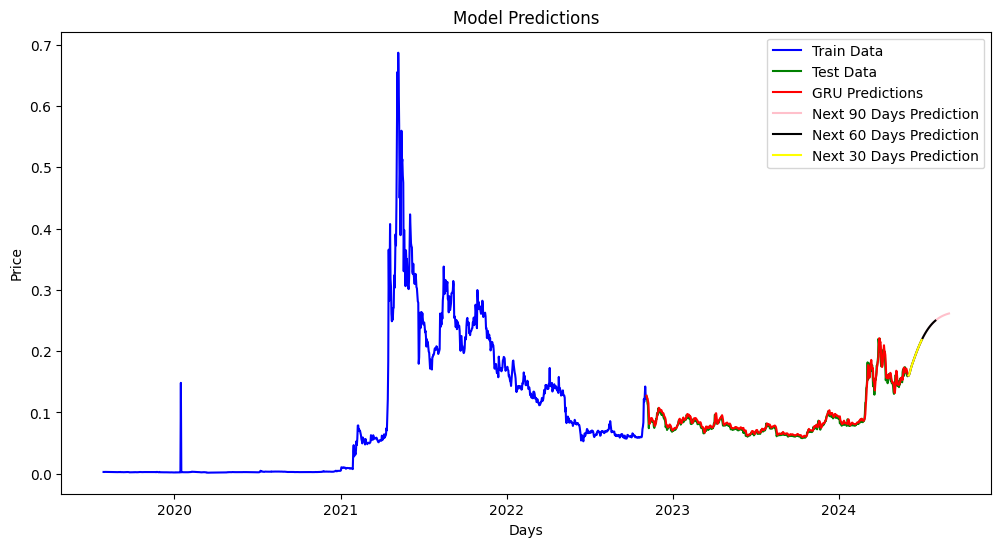

In [77]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_73.index[150:], train_data_DOGE_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_73.index, test_data_DOGE_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_73.index[0:], y_GRU_O_DOGEcoin_73, label="GRU Predictions", color="red")

plt.plot(next_90_days_DOGEcoin_73, predicted_prices_DOGEcoin_90days_73, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_DOGEcoin_73, predicted_prices_DOGEcoin_60days_73, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_DOGECoin_73, predicted_prices_DOGEcoin_73, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [78]:

actual_prices_DOGEcoin_73 = test_data_DOGE_73.Price.values
actual_prices_DOGEcoin_73 = np.reshape(actual_prices_DOGEcoin_73, (-1, 1))

mape_DOGEcoin_73 = calculate_mape(actual_prices_DOGEcoin_73, y_GRU_O_DOGEcoin_73)
mse_DOGEcoin_73 = calculate_mse(actual_prices_DOGEcoin_73, y_GRU_O_DOGEcoin_73)
rmse_DOGEcoin_73 = calculate_rmse(actual_prices_DOGEcoin_73, y_GRU_O_DOGEcoin_73)

print("MAPE: ", mape_DOGEcoin_73)
print("MSE: ", mse_DOGEcoin_73)
print("RMSE: ", rmse_DOGEcoin_73)

MAPE:  4.0600340993194015
MSE:  3.3446098811026206e-05
RMSE:  0.0057832602233537965


## Divide data 9:1

In [79]:


# Setting 90 percent data for training
training_data_len_DOGEcoin_91 = math.ceil(len(DOGECoin) * .9)
 
# Splitting the dataset
train_data_DOGE_91 = DOGECoin[:training_data_len_DOGEcoin_91]
test_data_DOGE_91 = DOGECoin[training_data_len_DOGEcoin_91:]


In [80]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_DOGEcoin_91 = scaled_DOGEcoin[:training_data_len_DOGEcoin_91]
scaled_test_DOGEcoin_91 = scaled_DOGEcoin[training_data_len_DOGEcoin_91:]


In [81]:

X_train_DOGEcoin_91 = []
y_train_DOGEcoin_91 = []
for i in range(50, len(scaled_train_DOGEcoin_91)):
    X_train_DOGEcoin_91.append(scaled_train_DOGEcoin_91[i-50:i, 0])
    y_train_DOGEcoin_91.append(scaled_train_DOGEcoin_91[i, 0])



In [82]:

last_50_days_train_DOGEcoin_91 = scaled_train_DOGEcoin_91[-50:]
full_test_input_DOGEcoin_91 = np.concatenate((last_50_days_train_DOGEcoin_91, scaled_test_DOGEcoin_91), axis=0)
X_test_DOGEcoin_91 = []
for i in range(50, len(full_test_input_DOGEcoin_91)):
    X_test_DOGEcoin_91.append(full_test_input_DOGEcoin_91[i-50:i, 0])




In [83]:

# The data is converted to Numpy array
X_train_DOGEcoin_91, y_train_DOGEcoin_91 = np.array(X_train_DOGEcoin_91), np.array(y_train_DOGEcoin_91)

# Reshaping
X_train_DOGEcoin_91 = np.reshape(X_train_DOGEcoin_91, (X_train_DOGEcoin_91.shape[0], X_train_DOGEcoin_91.shape[1], 1))

# The data is converted to numpy array
X_test_DOGEcoin_91 = np.array(X_test_DOGEcoin_91)

# Reshaping
X_test_DOGEcoin_91 = np.reshape(X_test_DOGEcoin_91, (X_test_DOGEcoin_91.shape[0], X_test_DOGEcoin_91.shape[1], 1))


In [84]:

regressorGRU_DOGEcoin_91 = Sequential()
regressorGRU_DOGEcoin_91.add(GRU(50, return_sequences=False, input_shape=(X_train_DOGEcoin_91.shape[1], 1)))
regressorGRU_DOGEcoin_91.add(Dense(1))

# Compile the regressorGRU_DOGEcoin_91
regressorGRU_DOGEcoin_91.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_DOGEcoin_91.fit(X_train_DOGEcoin_91, y_train_DOGEcoin_91, epochs=100, batch_size=64, validation_split=0.1)
y_GRU_DOGEcoin_91 = regressorGRU_DOGEcoin_91.predict(X_test_DOGEcoin_91)
y_GRU_O_DOGEcoin_91 = scaler.inverse_transform(y_GRU_DOGEcoin_91)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_91 = X_test_DOGEcoin_91[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - val_loss: 2.1257e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 2.9379e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011 - val_loss: 2.5266e-05
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.7997e-04 - val_loss: 2.8658e-05
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.4514e-04 - val_loss: 1.4531e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.1189e-04 - val_loss: 1.5728e-05
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.9922e-04 - val_loss: 2.3232e-05
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.3831e-04 - val_loss: 1.4655e-05
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2984e-04 - val_loss: 4.2341e-05
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9208e-04 - val_loss: 2.7429e-05
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0409e-04 - val_loss:

Predict next 30 days

In [85]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_91 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_91 = regressorGRU_DOGEcoin_91.predict(last_input_DOGEcoin_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_91.append(next_pred_DOGEcoin_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_91 = np.append(last_input_DOGEcoin_91[1:], next_pred_DOGEcoin_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_91 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_91).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

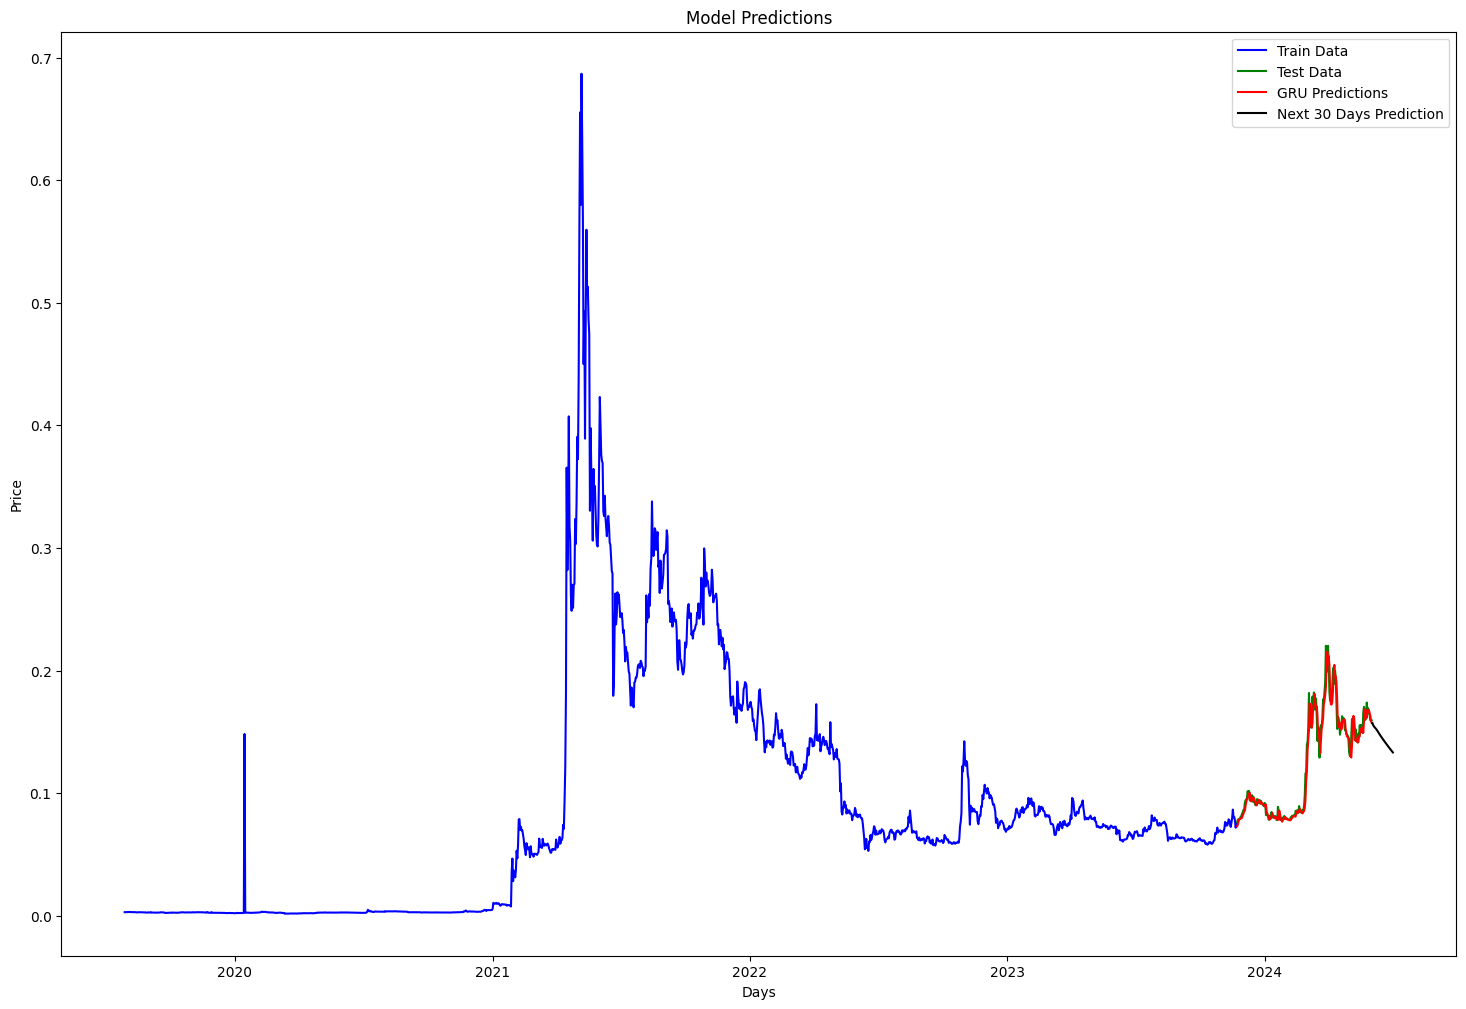

In [86]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_91.index[150:], train_data_DOGE_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_91.index, test_data_DOGE_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_91.index[0:], y_GRU_O_DOGEcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_DOGECoin_91 = pd.date_range(test_data_DOGE_91.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_DOGECoin_91, predicted_prices_DOGEcoin_91, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [87]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_60days_91 = X_test_DOGEcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_60days_91 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_60days_91 = regressorGRU_DOGEcoin_91.predict(last_input_DOGEcoin_60days_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_60days_91.append(next_pred_DOGEcoin_60days_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_60days_91 = np.append(last_input_DOGEcoin_60days_91[1:], next_pred_DOGEcoin_60days_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_60days_91 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_60days_91).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━

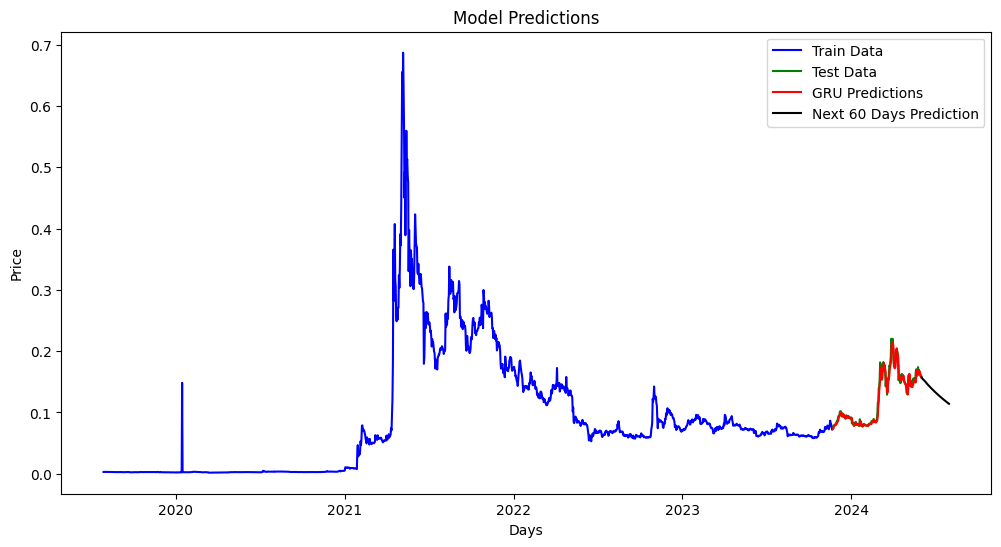

In [88]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_91.index[150:], train_data_DOGE_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_91.index, test_data_DOGE_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_91.index[0:], y_GRU_O_DOGEcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_DOGEcoin_91 = pd.date_range(test_data_DOGE_91.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_DOGEcoin_91, predicted_prices_DOGEcoin_60days_91, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [89]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_DOGEcoin_90days_91 = X_test_DOGEcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_DOGEcoin_90days_91 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_DOGEcoin_90days_91 = regressorGRU_DOGEcoin_91.predict(last_input_DOGEcoin_90days_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_DOGEcoin_90days_91.append(next_pred_DOGEcoin_90days_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_DOGEcoin_90days_91 = np.append(last_input_DOGEcoin_90days_91[1:], next_pred_DOGEcoin_90days_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_DOGEcoin_90days_91 = scaler.inverse_transform(np.array(predicted_prices_DOGEcoin_90days_91).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━

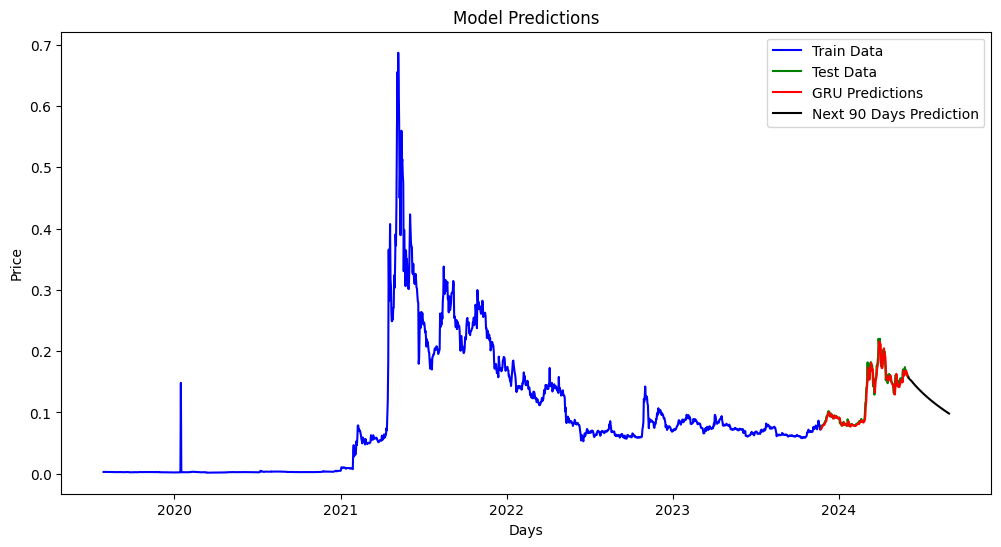

In [90]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_91.index[150:], train_data_DOGE_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_91.index, test_data_DOGE_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_91.index[0:], y_GRU_O_DOGEcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_DOGEcoin_91 = pd.date_range(test_data_DOGE_91.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_DOGEcoin_91, predicted_prices_DOGEcoin_90days_91, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


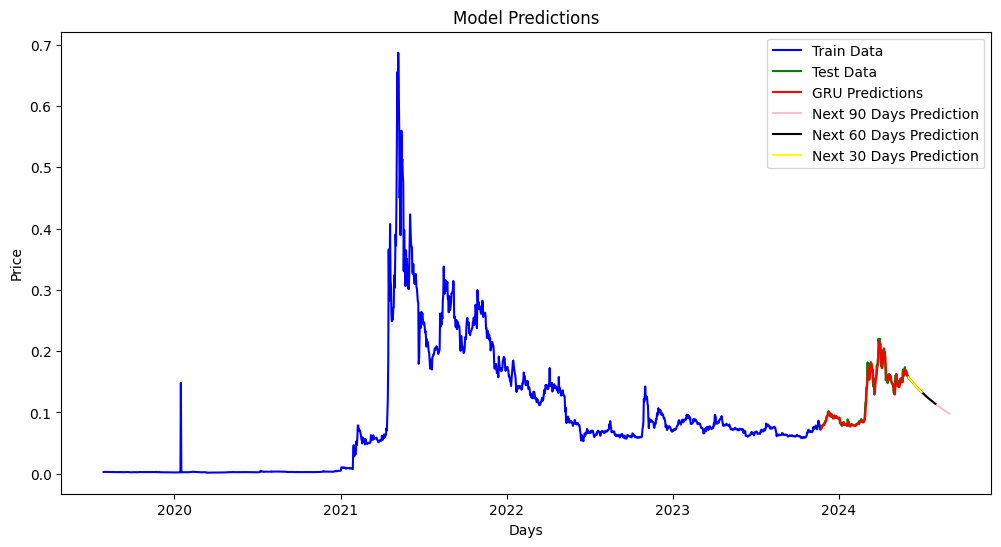

In [91]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_DOGE_91.index[150:], train_data_DOGE_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_DOGE_91.index, test_data_DOGE_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_DOGE_91.index[0:], y_GRU_O_DOGEcoin_91, label="GRU Predictions", color="red")

plt.plot(next_90_days_DOGEcoin_91, predicted_prices_DOGEcoin_90days_91, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_DOGEcoin_91, predicted_prices_DOGEcoin_60days_91, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_DOGECoin_91, predicted_prices_DOGEcoin_91, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [92]:

actual_prices_DOGEcoin_91 = test_data_DOGE_91.Price.values
actual_prices_DOGEcoin_91 = np.reshape(actual_prices_DOGEcoin_91, (-1, 1))

mape_DOGEcoin_91 = calculate_mape(actual_prices_DOGEcoin_91, y_GRU_O_DOGEcoin_91)
mse_DOGEcoin_91 = calculate_mse(actual_prices_DOGEcoin_91, y_GRU_O_DOGEcoin_91)
rmse_DOGEcoin_91 = calculate_rmse(actual_prices_DOGEcoin_91, y_GRU_O_DOGEcoin_91)

print("MAPE: ", mape_DOGEcoin_91)
print("MSE: ", mse_DOGEcoin_91)
print("RMSE: ", rmse_DOGEcoin_91)

MAPE:  3.777202520127602
MSE:  6.405036888232995e-05
RMSE:  0.008003147435998536


# TRON Coin

In [22]:

# TRON Coin
file_path = "D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/TRON Historical Data.csv"
TRONCoin = pd.read_csv(file_path)
# Chuyển đổi cột 'Date' sang định dạng ngày tháng
TRONCoin['Date'] = pd.to_datetime(TRONCoin['Date'])

# Đặt cột 'Date' làm chỉ số
TRONCoin.set_index('Date', inplace=True)
TRONCoin.sort_values('Date', inplace=True)


Scaler Data

In [25]:

# Selecting Price values
dataset_TRONcoin = TRONCoin.Price.values 
# Reshaping 1D to 2D array
dataset_TRONcoin = np.reshape(dataset_TRONcoin, (-1,1))


In [26]:

# Đánh dấu sửa đổi: Sử dụng scaler.fit_transform cho toàn bộ dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_TRONcoin = scaler.fit_transform(dataset_TRONcoin)


## Divide data 8:2

In [96]:


# Setting 80 percent data for training
training_data_len_TRONcoin_82 = math.ceil(len(TRONCoin) * .8)
 
# Splitting the dataset
train_data_TRON_82 = TRONCoin[:training_data_len_TRONcoin_82]
test_data_TRON_82 = TRONCoin[training_data_len_TRONcoin_82:]


In [97]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_TRONcoin_82 = scaled_TRONcoin[:training_data_len_TRONcoin_82]
scaled_test_TRONcoin_82 = scaled_TRONcoin[training_data_len_TRONcoin_82:]


In [98]:

X_train_TRONcoin_82 = []
y_train_TRONcoin_82 = []
for i in range(50, len(scaled_train_TRONcoin_82)):
    X_train_TRONcoin_82.append(scaled_train_TRONcoin_82[i-50:i, 0])
    y_train_TRONcoin_82.append(scaled_train_TRONcoin_82[i, 0])



In [99]:

last_50_days_train_TRONcoin_82 = scaled_train_TRONcoin_82[-50:]
full_test_input_TRONcoin_82 = np.concatenate((last_50_days_train_TRONcoin_82, scaled_test_TRONcoin_82), axis=0)
X_test_TRONcoin_82 = []
for i in range(50, len(full_test_input_TRONcoin_82)):
    X_test_TRONcoin_82.append(full_test_input_TRONcoin_82[i-50:i, 0])




In [100]:

# The data is converted to Numpy array
X_train_TRONcoin_82, y_train_TRONcoin_82 = np.array(X_train_TRONcoin_82), np.array(y_train_TRONcoin_82)

# Reshaping
X_train_TRONcoin_82 = np.reshape(X_train_TRONcoin_82, (X_train_TRONcoin_82.shape[0], X_train_TRONcoin_82.shape[1], 1))

# The data is converted to numpy array
X_test_TRONcoin_82 = np.array(X_test_TRONcoin_82)

# Reshaping
X_test_TRONcoin_82 = np.reshape(X_test_TRONcoin_82, (X_test_TRONcoin_82.shape[0], X_test_TRONcoin_82.shape[1], 1))


In [101]:

regressorGRU_TRONcoin_82 = Sequential()
regressorGRU_TRONcoin_82.add(GRU(50, return_sequences=False, input_shape=(X_train_TRONcoin_82.shape[1], 1)))
regressorGRU_TRONcoin_82.add(Dense(1))

# Compile the regressorGRU_TRONcoin_82
regressorGRU_TRONcoin_82.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_TRONcoin_82.fit(X_train_TRONcoin_82, y_train_TRONcoin_82, epochs=100, batch_size=64, validation_split=0.2)
y_GRU_TRONcoin_82 = regressorGRU_TRONcoin_82.predict(X_test_TRONcoin_82)
y_GRU_O_TRONcoin_82 = scaler.inverse_transform(y_GRU_TRONcoin_82)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_82 = X_test_TRONcoin_82[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0620 - val_loss: 0.0032
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0123 - val_loss: 0.0021
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031 - val_loss: 1.7697e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 1.4917e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010 - val_loss: 1.3259e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - val_loss: 2.9463e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9989e-04 - val_loss: 2.0184e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6591e-04 - val_loss: 1.6274e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010 - val_loss: 1.2438e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.4942e-04 - val_loss: 1.2067e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.7495e-04 - val_loss: 1.3526e-04
Epoch 12/100

Predict next 30 days

In [102]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_82 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_82 = regressorGRU_TRONcoin_82.predict(last_input_TRONcoin_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_82.append(next_pred_TRONcoin_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_82 = np.append(last_input_TRONcoin_82[1:], next_pred_TRONcoin_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_82 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_82).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

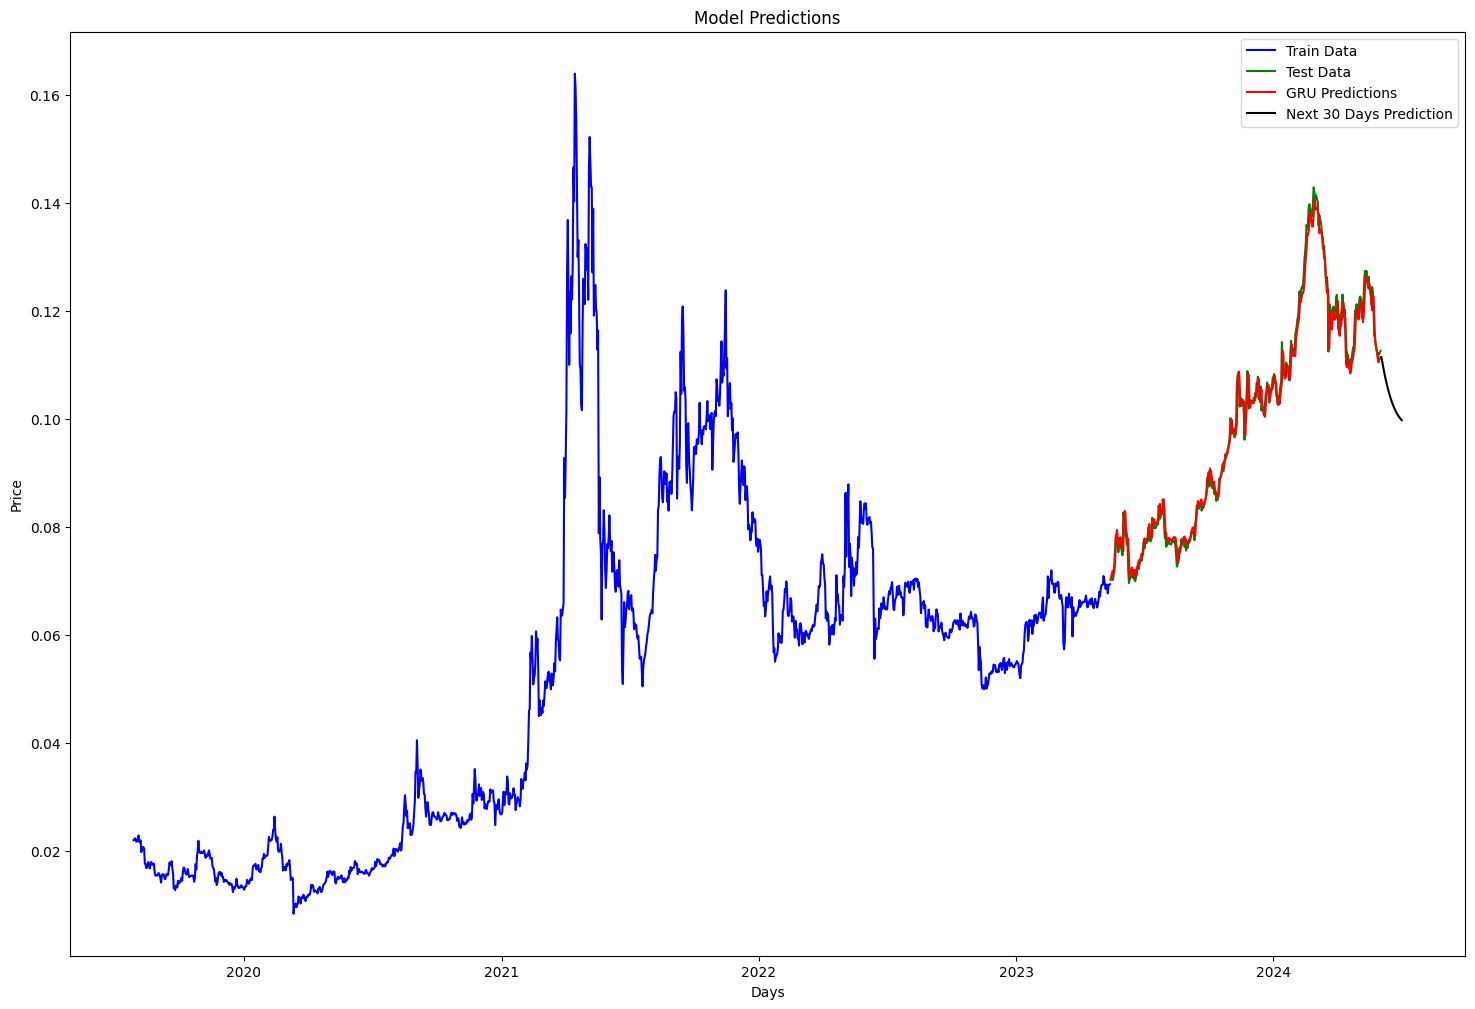

In [103]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_82.index[150:], train_data_TRON_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_82.index, test_data_TRON_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_82.index[0:], y_GRU_O_TRONcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_TRONCoin_82 = pd.date_range(test_data_TRON_82.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_TRONCoin_82, predicted_prices_TRONcoin_82, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [104]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_60days_82 = X_test_TRONcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_60days_82 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_60days_82 = regressorGRU_TRONcoin_82.predict(last_input_TRONcoin_60days_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_60days_82.append(next_pred_TRONcoin_60days_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_60days_82 = np.append(last_input_TRONcoin_60days_82[1:], next_pred_TRONcoin_60days_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_60days_82 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_60days_82).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

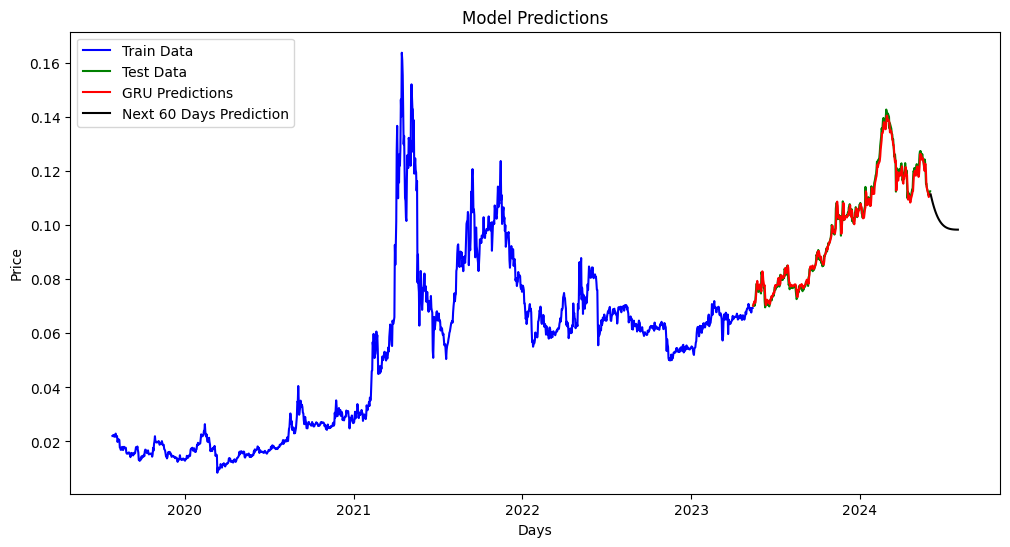

In [105]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_82.index[150:], train_data_TRON_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_82.index, test_data_TRON_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_82.index[0:], y_GRU_O_TRONcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_TRONcoin_82 = pd.date_range(test_data_TRON_82.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_TRONcoin_82, predicted_prices_TRONcoin_60days_82, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [106]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_90days_82 = X_test_TRONcoin_82[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_90days_82 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_90days_82 = regressorGRU_TRONcoin_82.predict(last_input_TRONcoin_90days_82.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_90days_82.append(next_pred_TRONcoin_90days_82[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_90days_82 = np.append(last_input_TRONcoin_90days_82[1:], next_pred_TRONcoin_90days_82)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_90days_82 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_90days_82).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

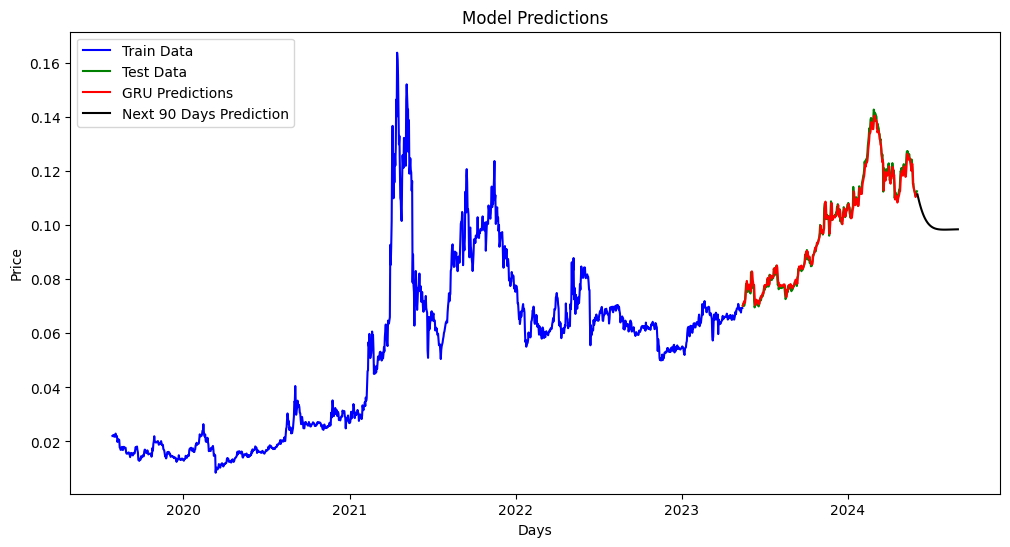

In [107]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_82.index[150:], train_data_TRON_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_82.index, test_data_TRON_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_82.index[0:], y_GRU_O_TRONcoin_82, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_TRONcoin_82 = pd.date_range(test_data_TRON_82.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_TRONcoin_82, predicted_prices_TRONcoin_90days_82, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


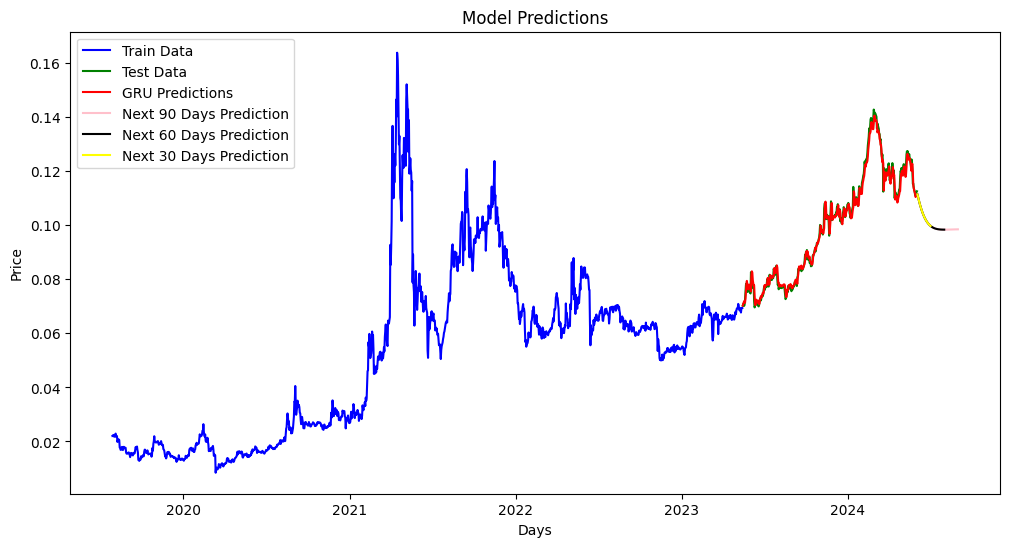

In [108]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_82.index[150:], train_data_TRON_82.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_82.index, test_data_TRON_82.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_82.index[0:], y_GRU_O_TRONcoin_82, label="GRU Predictions", color="red")

plt.plot(next_90_days_TRONcoin_82, predicted_prices_TRONcoin_90days_82, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_TRONcoin_82, predicted_prices_TRONcoin_60days_82, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_TRONCoin_82, predicted_prices_TRONcoin_82, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [109]:

actual_prices_TRONcoin_82 = test_data_TRON_82.Price.values
actual_prices_TRONcoin_82 = np.reshape(actual_prices_TRONcoin_82, (-1, 1))

mape_TRONcoin_82 = calculate_mape(actual_prices_TRONcoin_82, y_GRU_O_TRONcoin_82)
mse_TRONcoin_82 = calculate_mse(actual_prices_TRONcoin_82, y_GRU_O_TRONcoin_82)
rmse_TRONcoin_82 = calculate_rmse(actual_prices_TRONcoin_82, y_GRU_O_TRONcoin_82)

print("MAPE: ", mape_TRONcoin_82)
print("MSE: ", mse_TRONcoin_82)
print("RMSE: ", rmse_TRONcoin_82)

MAPE:  1.5085875786372638
MSE:  4.378382420453807e-06
RMSE:  0.0020924584632565127


## Divide data 7:3

In [110]:


# Setting 70 percent data for training
training_data_len_TRONcoin_73 = math.ceil(len(TRONCoin) * .7)
 
# Splitting the dataset
train_data_TRON_73 = TRONCoin[:training_data_len_TRONcoin_73]
test_data_TRON_73 = TRONCoin[training_data_len_TRONcoin_73:]


In [111]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_TRONcoin_73 = scaled_TRONcoin[:training_data_len_TRONcoin_73]
scaled_test_TRONcoin_73 = scaled_TRONcoin[training_data_len_TRONcoin_73:]


In [112]:

X_train_TRONcoin_73 = []
y_train_TRONcoin_73 = []
for i in range(50, len(scaled_train_TRONcoin_73)):
    X_train_TRONcoin_73.append(scaled_train_TRONcoin_73[i-50:i, 0])
    y_train_TRONcoin_73.append(scaled_train_TRONcoin_73[i, 0])



In [113]:

last_50_days_train_TRONcoin_73 = scaled_train_TRONcoin_73[-50:]
full_test_input_TRONcoin_73 = np.concatenate((last_50_days_train_TRONcoin_73, scaled_test_TRONcoin_73), axis=0)
X_test_TRONcoin_73 = []
for i in range(50, len(full_test_input_TRONcoin_73)):
    X_test_TRONcoin_73.append(full_test_input_TRONcoin_73[i-50:i, 0])




In [114]:

# The data is converted to Numpy array
X_train_TRONcoin_73, y_train_TRONcoin_73 = np.array(X_train_TRONcoin_73), np.array(y_train_TRONcoin_73)

# Reshaping
X_train_TRONcoin_73 = np.reshape(X_train_TRONcoin_73, (X_train_TRONcoin_73.shape[0], X_train_TRONcoin_73.shape[1], 1))

# The data is converted to numpy array
X_test_TRONcoin_73 = np.array(X_test_TRONcoin_73)

# Reshaping
X_test_TRONcoin_73 = np.reshape(X_test_TRONcoin_73, (X_test_TRONcoin_73.shape[0], X_test_TRONcoin_73.shape[1], 1))


In [115]:

regressorGRU_TRONcoin_73 = Sequential()
regressorGRU_TRONcoin_73.add(GRU(50, return_sequences=False, input_shape=(X_train_TRONcoin_73.shape[1], 1)))
regressorGRU_TRONcoin_73.add(Dense(1))

# Compile the regressorGRU_TRONcoin_73
regressorGRU_TRONcoin_73.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_TRONcoin_73.fit(X_train_TRONcoin_73, y_train_TRONcoin_73, epochs=100, batch_size=64, validation_split=0.3)
y_GRU_TRONcoin_73 = regressorGRU_TRONcoin_73.predict(X_test_TRONcoin_73)
y_GRU_O_TRONcoin_73 = scaler.inverse_transform(y_GRU_TRONcoin_73)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_73 = X_test_TRONcoin_73[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0577 - val_loss: 0.0082
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0174 - val_loss: 0.0055
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 5.5828e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 6.4275e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 6.8198e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 5.4446e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011 - val_loss: 5.0229e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 5.1972e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7219e-04 - val_loss: 5.1500e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011 - val_loss: 5.9635e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 4.6541e-04
Epoch 12/100
15/15 ━━━━━

Predict next 30 days

In [116]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_73 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_73 = regressorGRU_TRONcoin_73.predict(last_input_TRONcoin_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_73.append(next_pred_TRONcoin_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_73 = np.append(last_input_TRONcoin_73[1:], next_pred_TRONcoin_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_73 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_73).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

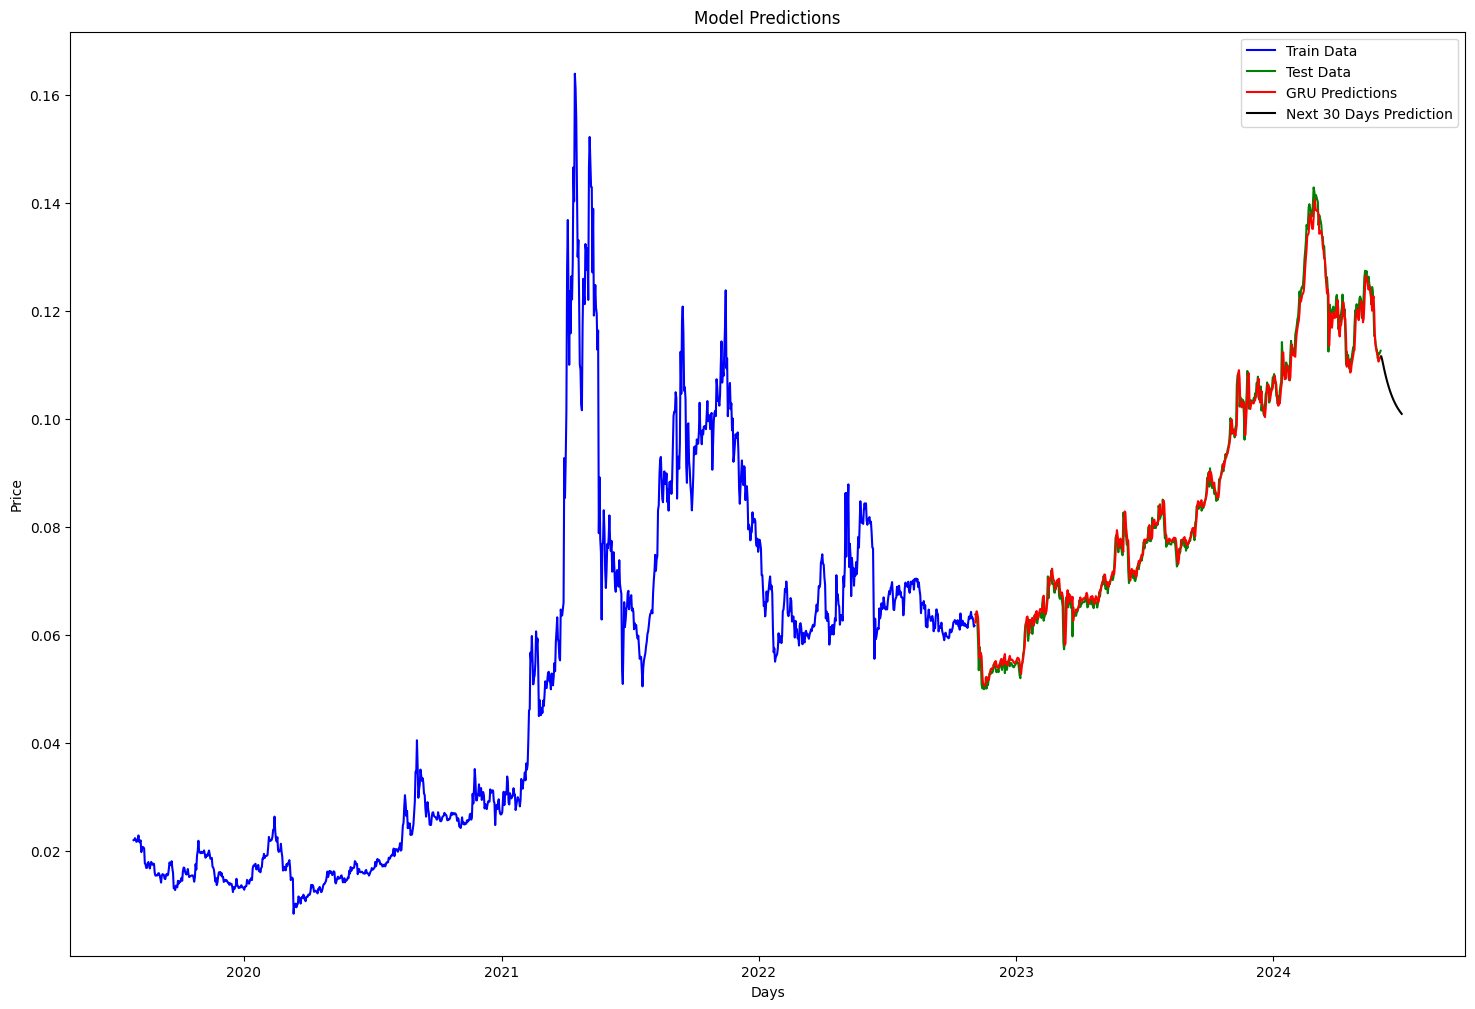

In [117]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_73.index[150:], train_data_TRON_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_73.index, test_data_TRON_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_73.index[0:], y_GRU_O_TRONcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_TRONCoin_73 = pd.date_range(test_data_TRON_73.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_TRONCoin_73, predicted_prices_TRONcoin_73, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [118]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_60days_73 = X_test_TRONcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_60days_73 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_60days_73 = regressorGRU_TRONcoin_73.predict(last_input_TRONcoin_60days_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_60days_73.append(next_pred_TRONcoin_60days_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_60days_73 = np.append(last_input_TRONcoin_60days_73[1:], next_pred_TRONcoin_60days_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_60days_73 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_60days_73).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━

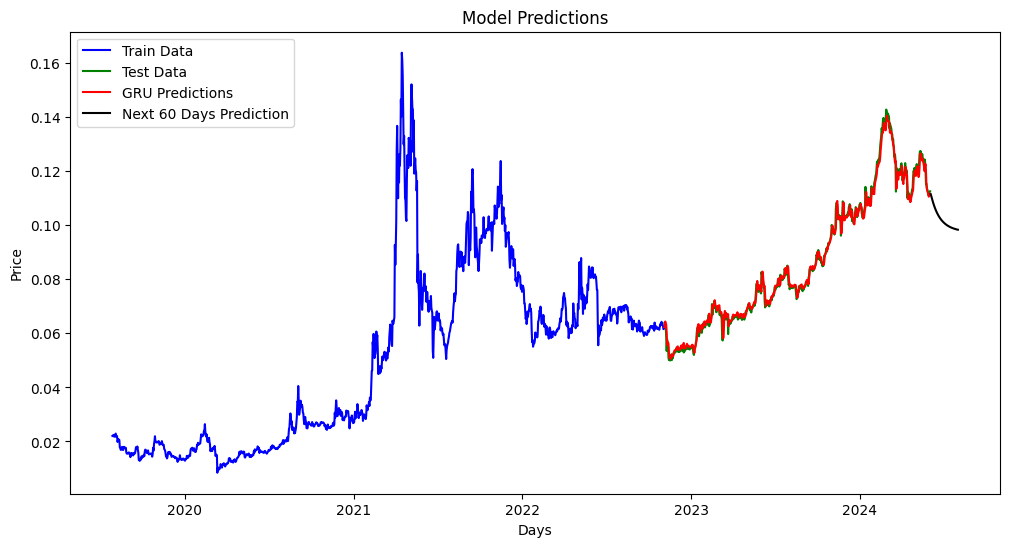

In [119]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_73.index[150:], train_data_TRON_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_73.index, test_data_TRON_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_73.index[0:], y_GRU_O_TRONcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_TRONcoin_73 = pd.date_range(test_data_TRON_73.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_TRONcoin_73, predicted_prices_TRONcoin_60days_73, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [120]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_90days_73 = X_test_TRONcoin_73[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_90days_73 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_90days_73 = regressorGRU_TRONcoin_73.predict(last_input_TRONcoin_90days_73.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_90days_73.append(next_pred_TRONcoin_90days_73[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_90days_73 = np.append(last_input_TRONcoin_90days_73[1:], next_pred_TRONcoin_90days_73)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_90days_73 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_90days_73).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

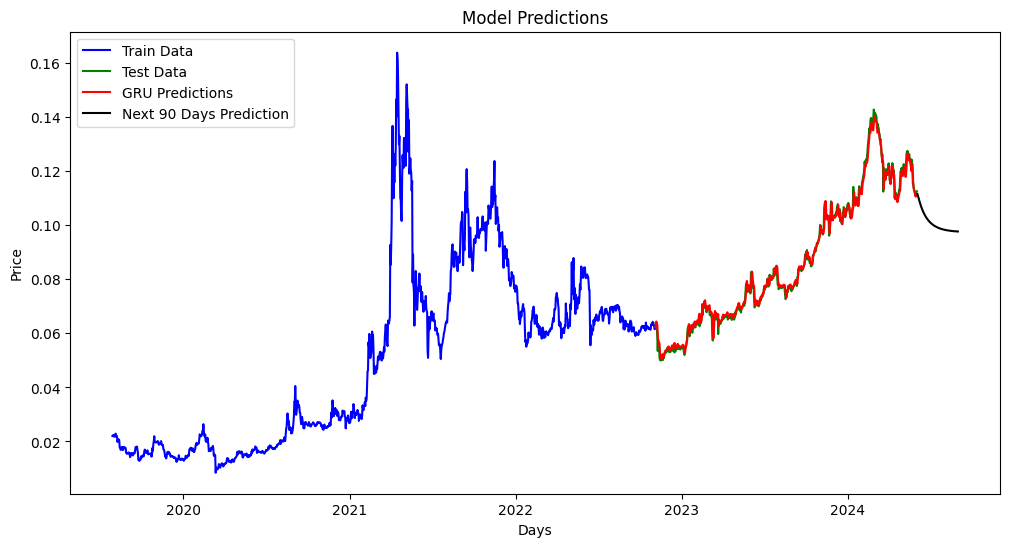

In [121]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_73.index[150:], train_data_TRON_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_73.index, test_data_TRON_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_73.index[0:], y_GRU_O_TRONcoin_73, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_TRONcoin_73 = pd.date_range(test_data_TRON_73.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_TRONcoin_73, predicted_prices_TRONcoin_90days_73, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


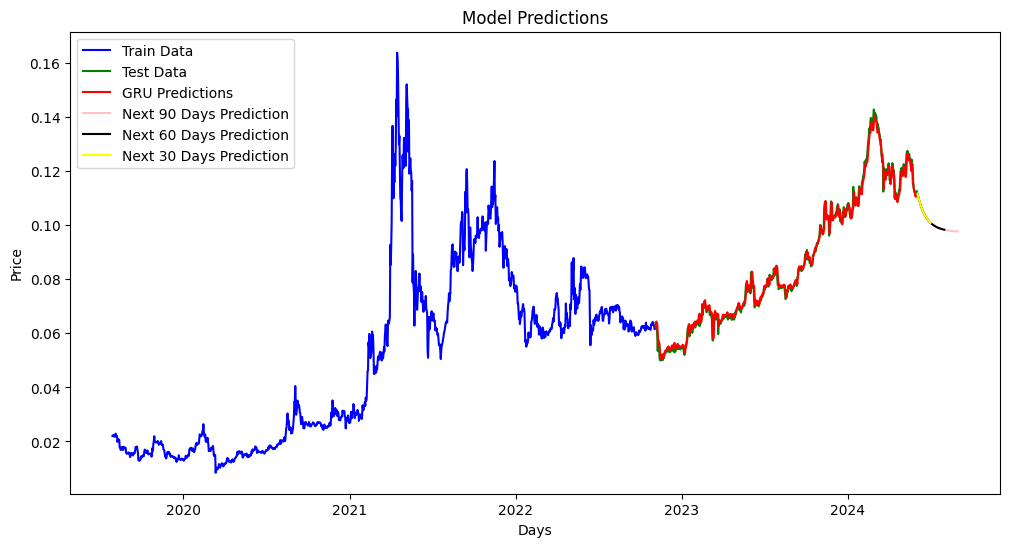

In [122]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_73.index[150:], train_data_TRON_73.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_73.index, test_data_TRON_73.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_73.index[0:], y_GRU_O_TRONcoin_73, label="GRU Predictions", color="red")

plt.plot(next_90_days_TRONcoin_73, predicted_prices_TRONcoin_90days_73, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_TRONcoin_73, predicted_prices_TRONcoin_60days_73, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_TRONCoin_73, predicted_prices_TRONcoin_73, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [123]:

actual_prices_TRONcoin_73 = test_data_TRON_73.Price.values
actual_prices_TRONcoin_73 = np.reshape(actual_prices_TRONcoin_73, (-1, 1))

mape_TRONcoin_73 = calculate_mape(actual_prices_TRONcoin_73, y_GRU_O_TRONcoin_73)
mse_TRONcoin_73 = calculate_mse(actual_prices_TRONcoin_73, y_GRU_O_TRONcoin_73)
rmse_TRONcoin_73 = calculate_rmse(actual_prices_TRONcoin_73, y_GRU_O_TRONcoin_73)

print("MAPE: ", mape_TRONcoin_73)
print("MSE: ", mse_TRONcoin_73)
print("RMSE: ", rmse_TRONcoin_73)

MAPE:  1.6814325847601501
MSE:  4.070024799072336e-06
RMSE:  0.00201743024639573


## Divide data 9:1

In [27]:


# Setting 90 percent data for training
training_data_len_TRONcoin_91 = math.ceil(len(TRONCoin) * .9)
 
# Splitting the dataset
train_data_TRON_91 = TRONCoin[:training_data_len_TRONcoin_91]
test_data_TRON_91 = TRONCoin[training_data_len_TRONcoin_91:]


In [28]:

# Chia tách dữ liệu đã chuẩn hóa thành tập huấn luyện và kiểm tra
scaled_train_TRONcoin_91 = scaled_TRONcoin[:training_data_len_TRONcoin_91]
scaled_test_TRONcoin_91 = scaled_TRONcoin[training_data_len_TRONcoin_91:]


In [29]:

X_train_TRONcoin_91 = []
y_train_TRONcoin_91 = []
for i in range(50, len(scaled_train_TRONcoin_91)):
    X_train_TRONcoin_91.append(scaled_train_TRONcoin_91[i-50:i, 0])
    y_train_TRONcoin_91.append(scaled_train_TRONcoin_91[i, 0])



In [30]:

last_50_days_train_TRONcoin_91 = scaled_train_TRONcoin_91[-50:]
full_test_input_TRONcoin_91 = np.concatenate((last_50_days_train_TRONcoin_91, scaled_test_TRONcoin_91), axis=0)
X_test_TRONcoin_91 = []
for i in range(50, len(full_test_input_TRONcoin_91)):
    X_test_TRONcoin_91.append(full_test_input_TRONcoin_91[i-50:i, 0])




In [31]:

# The data is converted to Numpy array
X_train_TRONcoin_91, y_train_TRONcoin_91 = np.array(X_train_TRONcoin_91), np.array(y_train_TRONcoin_91)

# Reshaping
X_train_TRONcoin_91 = np.reshape(X_train_TRONcoin_91, (X_train_TRONcoin_91.shape[0], X_train_TRONcoin_91.shape[1], 1))

# The data is converted to numpy array
X_test_TRONcoin_91 = np.array(X_test_TRONcoin_91)

# Reshaping
X_test_TRONcoin_91 = np.reshape(X_test_TRONcoin_91, (X_test_TRONcoin_91.shape[0], X_test_TRONcoin_91.shape[1], 1))


In [32]:

regressorGRU_TRONcoin_91 = Sequential()
regressorGRU_TRONcoin_91.add(GRU(50, return_sequences=False, input_shape=(X_train_TRONcoin_91.shape[1], 1)))
regressorGRU_TRONcoin_91.add(Dense(1))

# Compile the regressorGRU_TRONcoin_91
regressorGRU_TRONcoin_91.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
regressorGRU_TRONcoin_91.fit(X_train_TRONcoin_91, y_train_TRONcoin_91, epochs=100, batch_size=64, validation_split=0.1)
y_GRU_TRONcoin_91 = regressorGRU_TRONcoin_91.predict(X_test_TRONcoin_91)
y_GRU_O_TRONcoin_91 = scaler.inverse_transform(y_GRU_TRONcoin_91)

# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_91 = X_test_TRONcoin_91[-1]


Epoch 1/100


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0774 - val_loss: 0.0011
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - val_loss: 0.0037
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030 - val_loss: 5.8793e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010 - val_loss: 2.7292e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.8475e-04 - val_loss: 2.2072e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010 - val_loss: 1.9083e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9141e-04 - val_loss: 2.0855e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.4431e-04 - val_loss: 2.3379e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.7387e-04 - val_loss: 2.1197e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.4218e-04 - val_loss: 1.7787e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.0432e-04 - val_loss: 1.8438e-04
Epoc

Predict next 30 days

In [33]:

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_91 = []
for _ in range(30):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_91 = regressorGRU_TRONcoin_91.predict(last_input_TRONcoin_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_91.append(next_pred_TRONcoin_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_91 = np.append(last_input_TRONcoin_91[1:], next_pred_TRONcoin_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_91 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_91).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

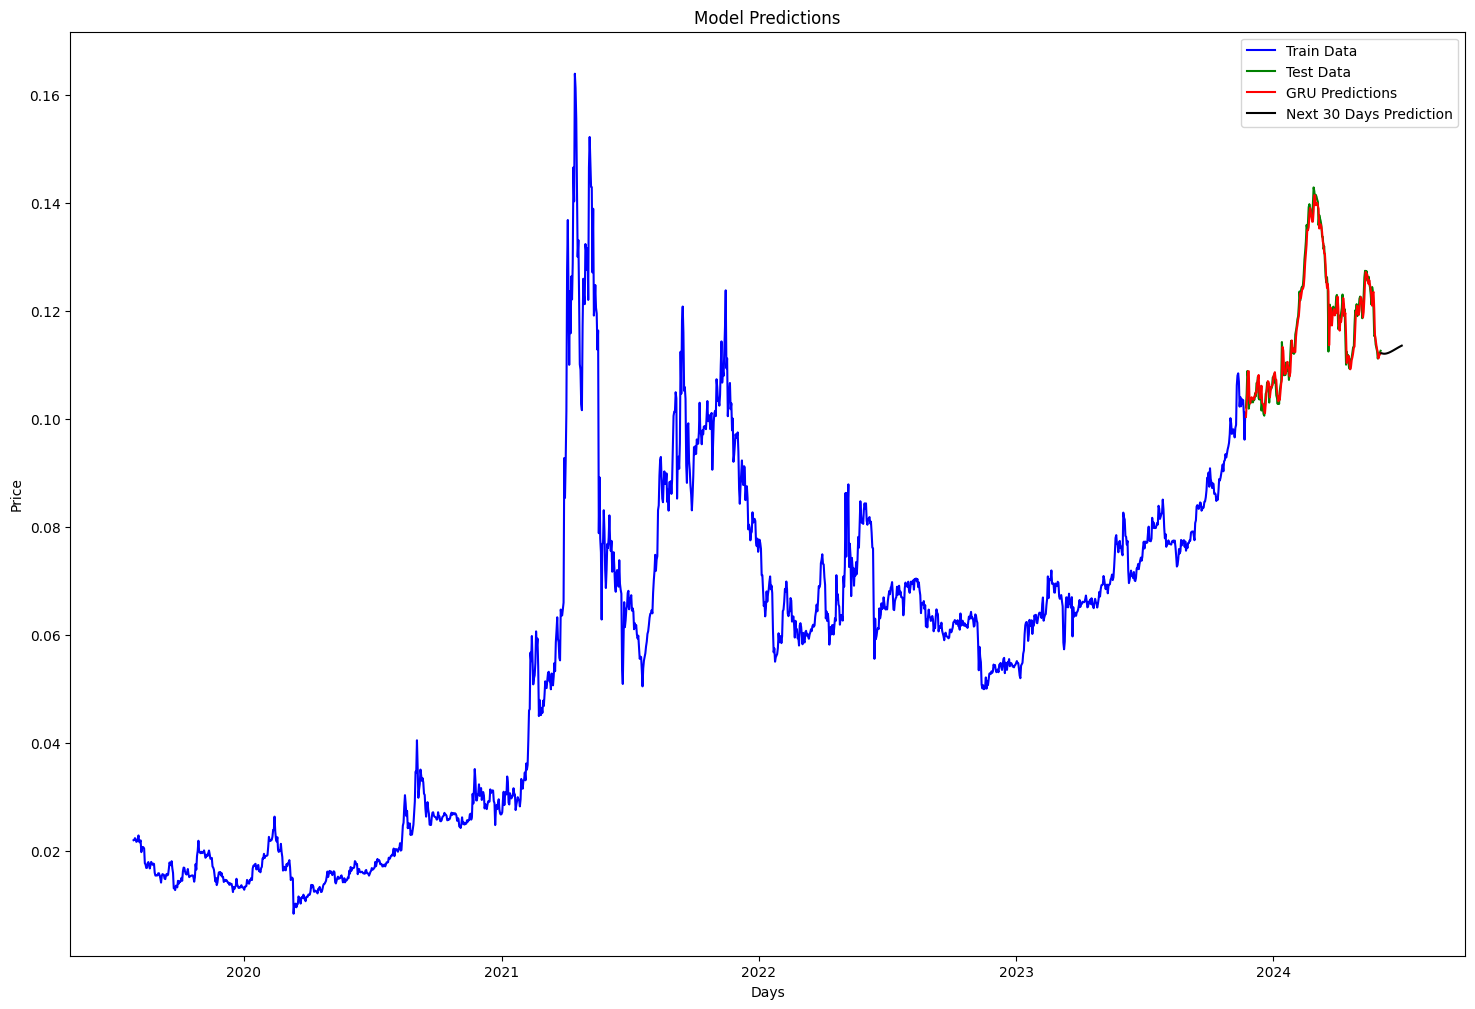

In [34]:

# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(18, 12))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_91.index[150:], train_data_TRON_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_91.index, test_data_TRON_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_91.index[0:], y_GRU_O_TRONcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_30_days_TRONCoin_91 = pd.date_range(test_data_TRON_91.index[-1], periods=31)[1:]  # Tạo ngày tiếp theo (30 ngày)
plt.plot(next_30_days_TRONCoin_91, predicted_prices_TRONcoin_91, label="Next 30 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 60 days

In [35]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_60days_91 = X_test_TRONcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_60days_91 = []
for _ in range(60):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_60days_91 = regressorGRU_TRONcoin_91.predict(last_input_TRONcoin_60days_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_60days_91.append(next_pred_TRONcoin_60days_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_60days_91 = np.append(last_input_TRONcoin_60days_91[1:], next_pred_TRONcoin_60days_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_60days_91 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_60days_91).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━

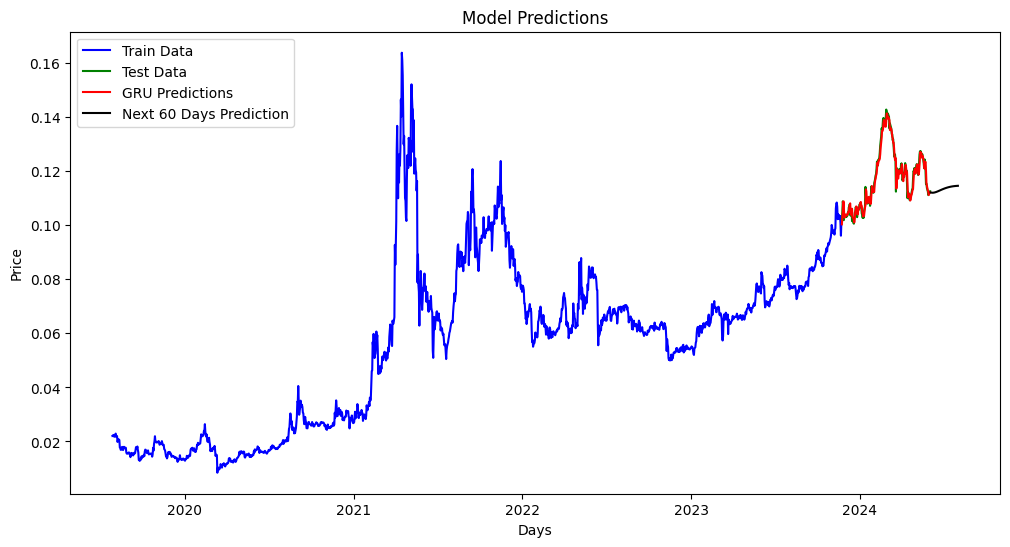

In [36]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_91.index[150:], train_data_TRON_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_91.index, test_data_TRON_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_91.index[0:], y_GRU_O_TRONcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_60_days_TRONcoin_91 = pd.date_range(test_data_TRON_91.index[-1], periods=61)[1:]  # Tạo ngày tiếp theo (60 ngày)
plt.plot(next_60_days_TRONcoin_91, predicted_prices_TRONcoin_60days_91, label="Next 60 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Prediction 90 days

In [37]:
# Sử dụng dữ liệu cuối cùng của dữ liệu kiểm tra làm dữ liệu đầu vào ban đầu
last_input_TRONcoin_90days_91 = X_test_TRONcoin_91[-1]

# Dự đoán và chuyển ngược lại dạng không chuẩn hóa
predicted_prices_TRONcoin_90days_91 = []
for _ in range(90):
    # Dự đoán giá trị tiếp theo
    next_pred_TRONcoin_90days_91 = regressorGRU_TRONcoin_91.predict(last_input_TRONcoin_90days_91.reshape(1, 50, 1))
    
    # Thêm giá trị dự đoán vào danh sách dự đoán
    predicted_prices_TRONcoin_90days_91.append(next_pred_TRONcoin_90days_91[0][0])
    
    # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo
    last_input_TRONcoin_90days_91 = np.append(last_input_TRONcoin_90days_91[1:], next_pred_TRONcoin_90days_91)
    
# Chuyển đổi giá trị dự đoán về dạng không chuẩn hóa
predicted_prices_TRONcoin_90days_91 = scaler.inverse_transform(np.array(predicted_prices_TRONcoin_90days_91).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

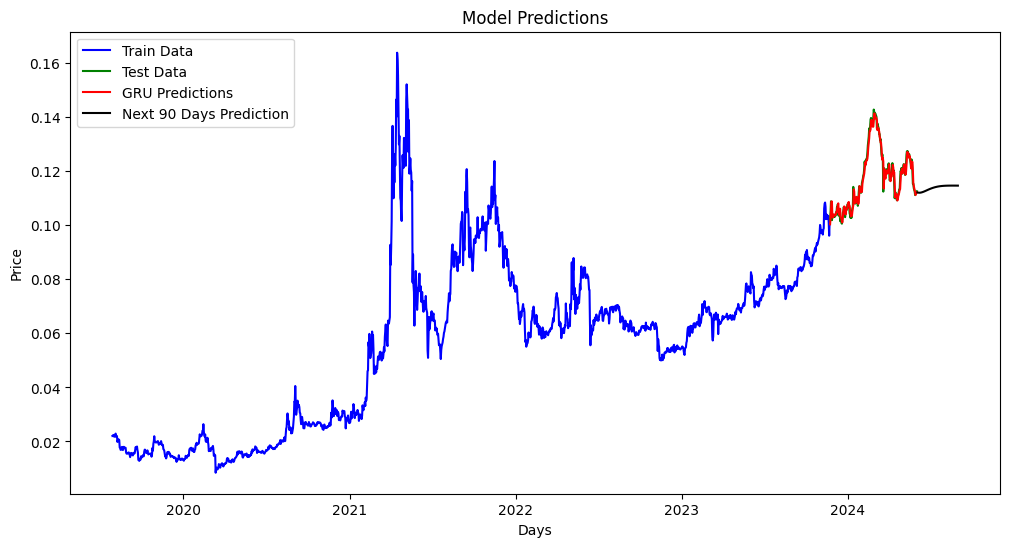

In [38]:


# Vẽ biểu đồ cho dữ liệu huấn luyện, dữ liệu kiểm tra, dự đoán từ mô hình GRU và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_91.index[150:], train_data_TRON_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_91.index, test_data_TRON_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_91.index[0:], y_GRU_O_TRONcoin_91, label="GRU Predictions", color="red")

# Biểu đồ cho dự đoán 30 ngày tiếp theo
next_90_days_TRONcoin_91 = pd.date_range(test_data_TRON_91.index[-1], periods=91)[1:]  # Tạo ngày tiếp theo (90 ngày)
plt.plot(next_90_days_TRONcoin_91, predicted_prices_TRONcoin_90days_91, label="Next 90 Days Prediction", color="black")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


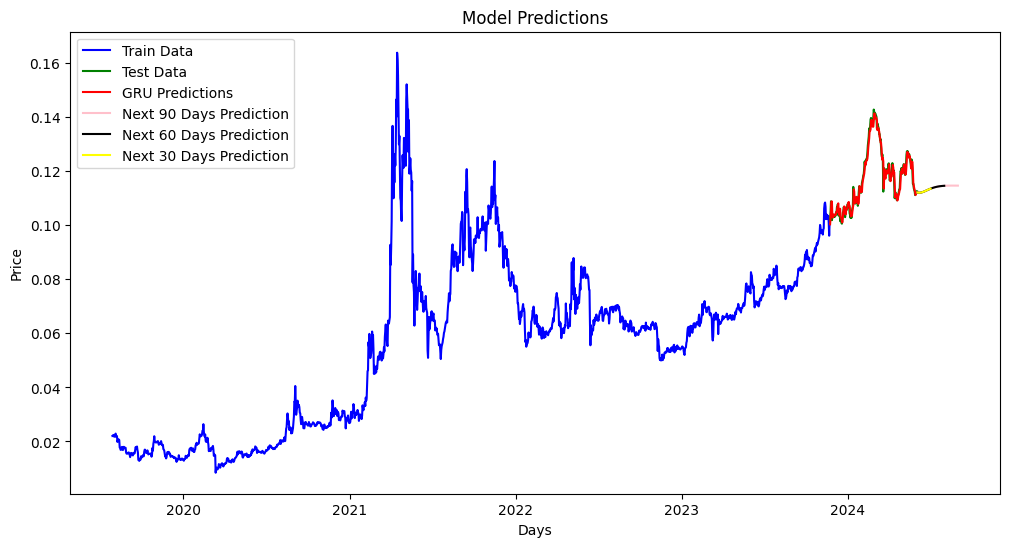

In [39]:


plt.figure(figsize=(12, 6))

# Biểu đồ cho dữ liệu huấn luyện và dữ liệu kiểm tra
plt.plot(train_data_TRON_91.index[150:], train_data_TRON_91.Price[150:], label="Train Data", color="b")
plt.plot(test_data_TRON_91.index, test_data_TRON_91.Price, label="Test Data", color="g")

# Biểu đồ cho kết quả dự đoán từ mô hình GRU
plt.plot(test_data_TRON_91.index[0:], y_GRU_O_TRONcoin_91, label="GRU Predictions", color="red")

plt.plot(next_90_days_TRONcoin_91, predicted_prices_TRONcoin_90days_91, label="Next 90 Days Prediction", color="pink")
plt.plot(next_60_days_TRONcoin_91, predicted_prices_TRONcoin_60days_91, label="Next 60 Days Prediction", color="black")
plt.plot(next_30_days_TRONCoin_91, predicted_prices_TRONcoin_91, label="Next 30 Days Prediction", color="yellow")

plt.title("Model Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [40]:

actual_prices_TRONcoin_91 = test_data_TRON_91.Price.values
actual_prices_TRONcoin_91 = np.reshape(actual_prices_TRONcoin_91, (-1, 1))

mape_TRONcoin_91 = calculate_mape(actual_prices_TRONcoin_91, y_GRU_O_TRONcoin_91)
mse_TRONcoin_91 = calculate_mse(actual_prices_TRONcoin_91, y_GRU_O_TRONcoin_91)
rmse_TRONcoin_91 = calculate_rmse(actual_prices_TRONcoin_91, y_GRU_O_TRONcoin_91)

print("MAPE: ", mape_TRONcoin_91)
print("MSE: ", mse_TRONcoin_91)
print("RMSE: ", rmse_TRONcoin_91)

MAPE:  1.3549572482460275
MSE:  4.805505217441665e-06
RMSE:  0.002192146258223129
